In [3]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

In [4]:
data_root = '../data/'
pic_root = '../pic/'
train_identity = pd.read_csv(f'{data_root}train_identity.csv')
train_transaction = pd.read_csv(f'{data_root}train_transaction.csv')
df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
del train_identity,train_transaction

In [5]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [3]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [6]:
print(f'Feature num: {df.shape[1]}, Sample num: {df.shape[0]}')

Feature num: 434, Sample num: 590540


/home/fbsh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


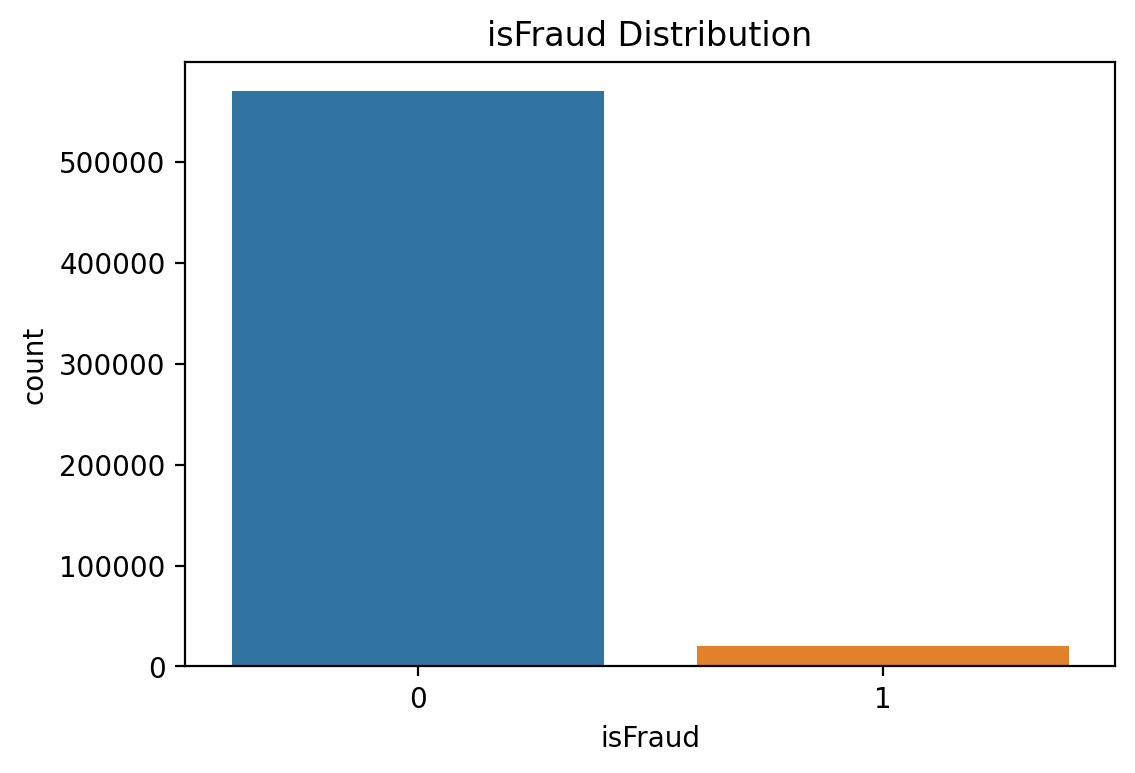

In [7]:
#View the distribution of all labels
plt.figure(dpi=200)
plt.title('isFraud Distribution')
sns.countplot(df['isFraud'])
plt.savefig(os.path.join(pic_root,'label_dist.jpg'))

In [9]:
# Counting different types of features, the most features of float types are found here.
cols = list(df.columns)
# dtypes = list(df.dtypes)
# plt.figure(dpi=200)
# plt.title('Feature Type Count Of All feature')
# sns.countplot(dtypes)
# plt.savefig(os.path.join(pic_root,'feature_dtype_count.jpg'))

/home/fbsh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


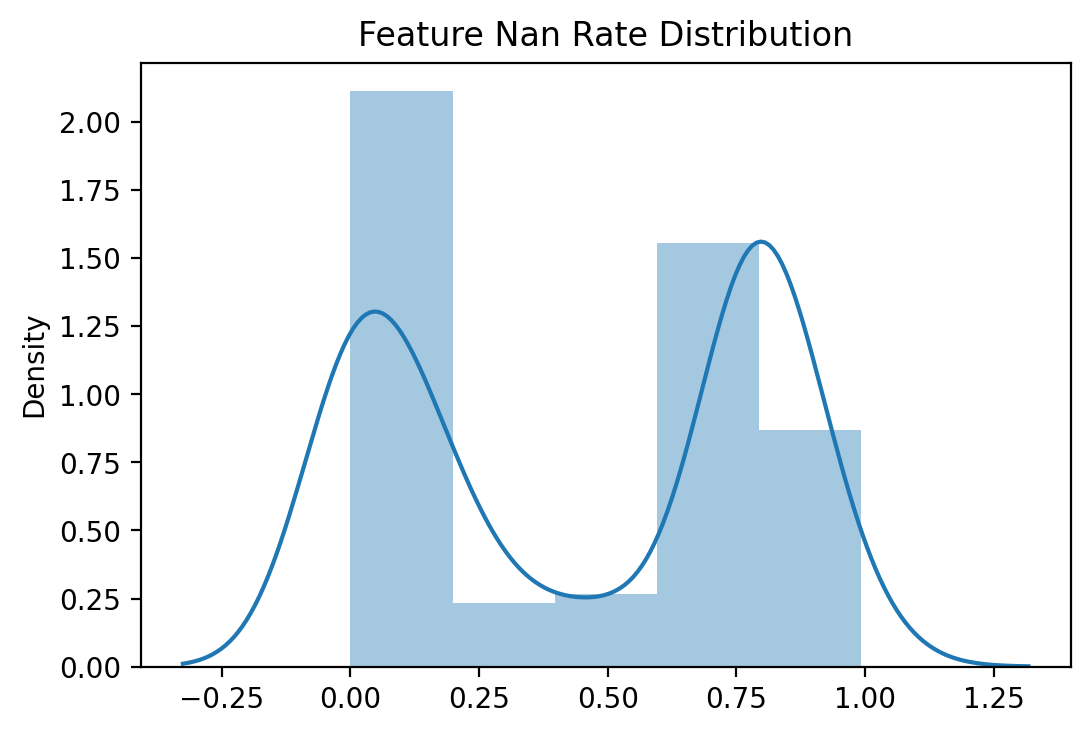

In [10]:
# View the distribution of nan ratio in all features
nan_list = []
num_sample = df.shape[0]
for col in cols:
    nan_list.append((num_sample - df[col].count())/num_sample) 
    
plt.figure(dpi=200)
plt.title('Feature Nan Rate Distribution')
sns.distplot(nan_list)
plt.savefig(os.path.join(pic_root,'feature_nan_dist.jpg'))

In [11]:
#The characteristics of the output nan ratio are too high, which can be changed by setting hold.
threshold = 0.9
nan_cols = []
for i,col in enumerate(cols):
    if nan_list[i] > threshold:
        print(f'Feature: {col} Nan rate: {nan_list[i]}')
        nan_cols.append(col)

Feature: dist2 Nan rate: 0.9362837403054831
Feature: D7 Nan rate: 0.9340992989467267
Feature: id_07 Nan rate: 0.9912707013919464
Feature: id_08 Nan rate: 0.9912707013919464
Feature: id_18 Nan rate: 0.9236072069631185
Feature: id_21 Nan rate: 0.9912639279303688
Feature: id_22 Nan rate: 0.9912469942764249
Feature: id_23 Nan rate: 0.9912469942764249
Feature: id_24 Nan rate: 0.9919615944728554
Feature: id_25 Nan rate: 0.9913096487960172
Feature: id_26 Nan rate: 0.9912571544687913
Feature: id_27 Nan rate: 0.9912469942764249


['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_19', 'id_20', 'id_32']


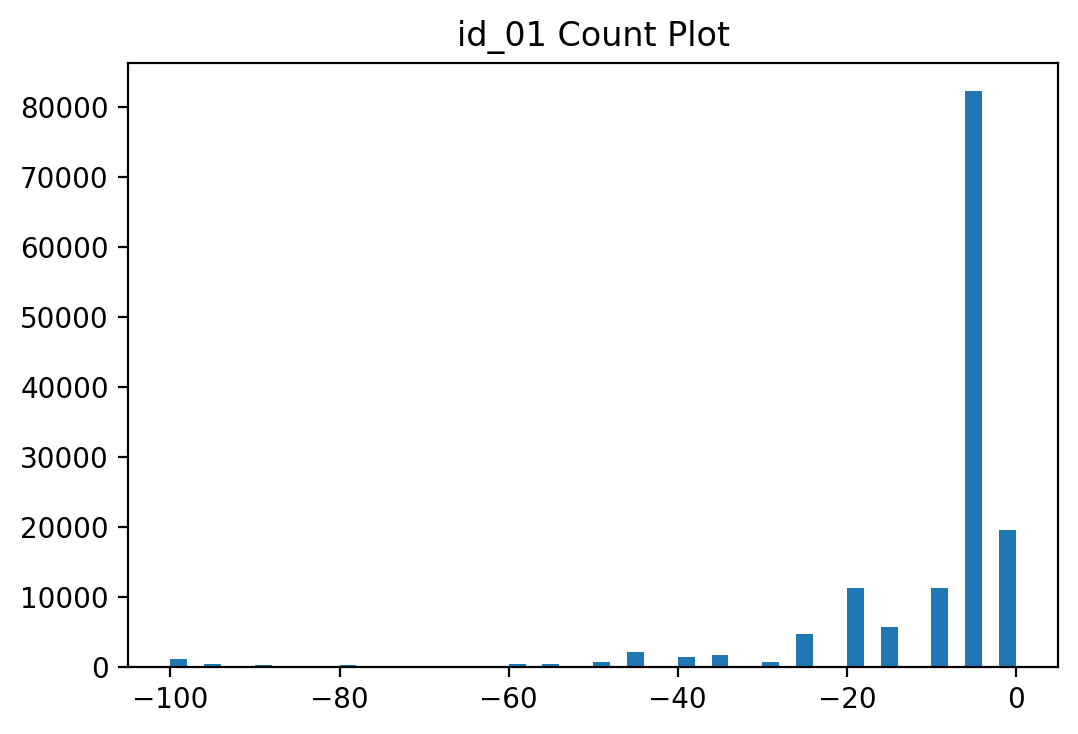

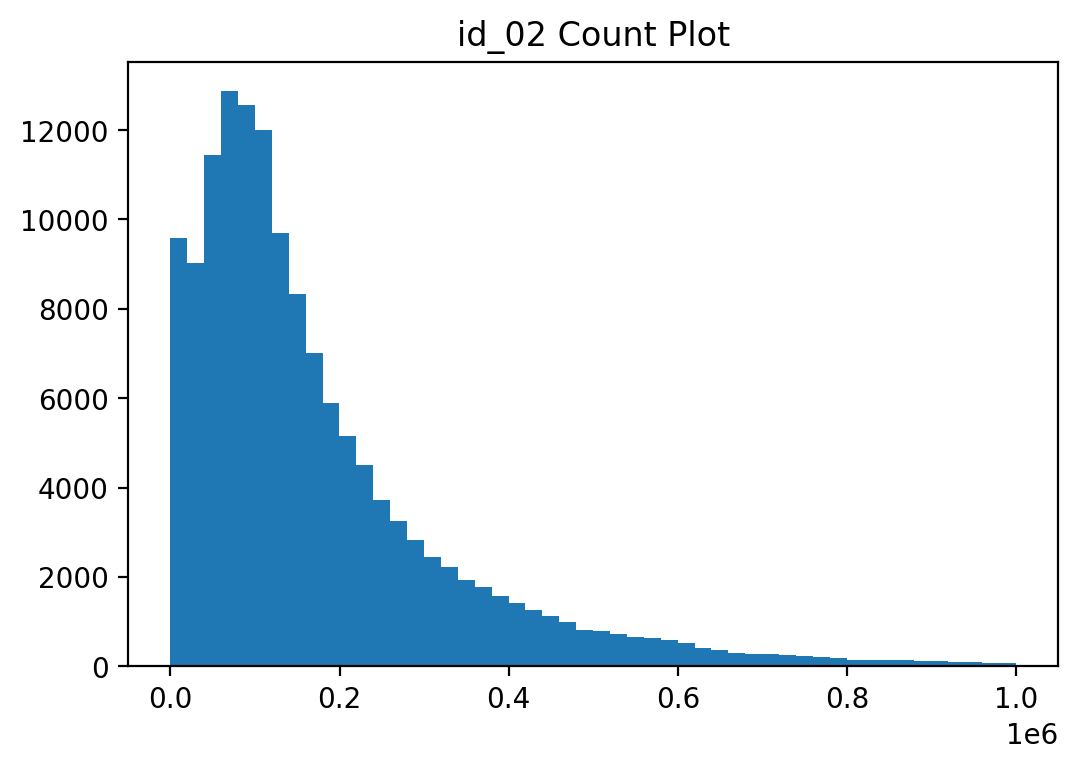

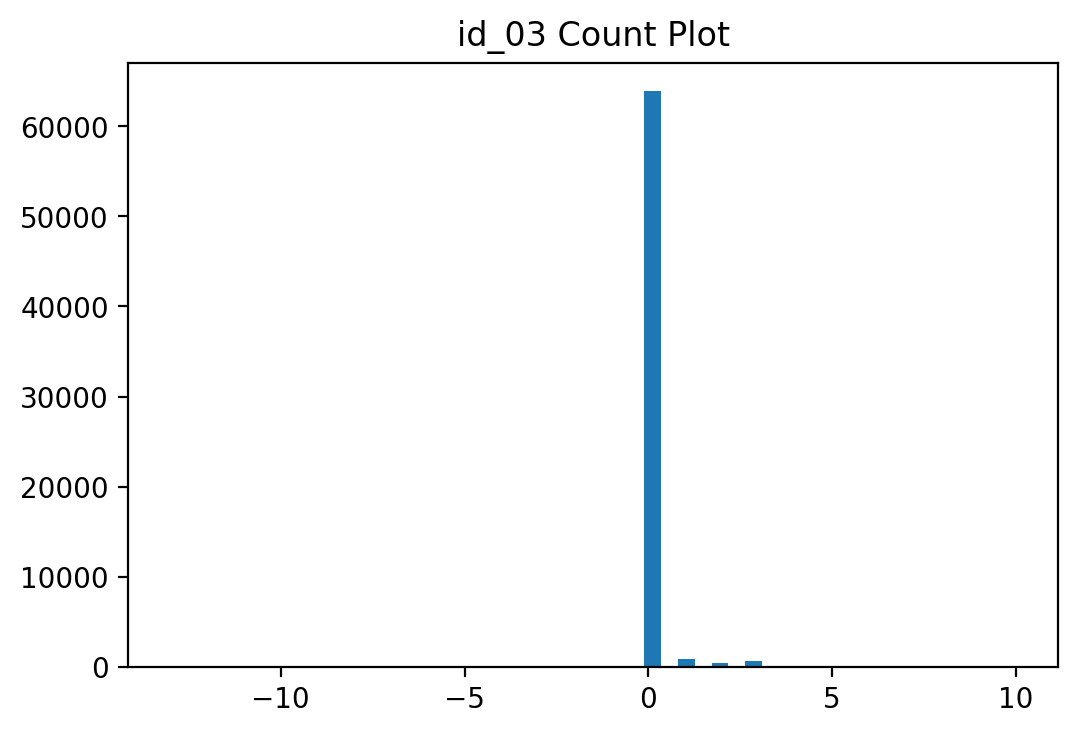

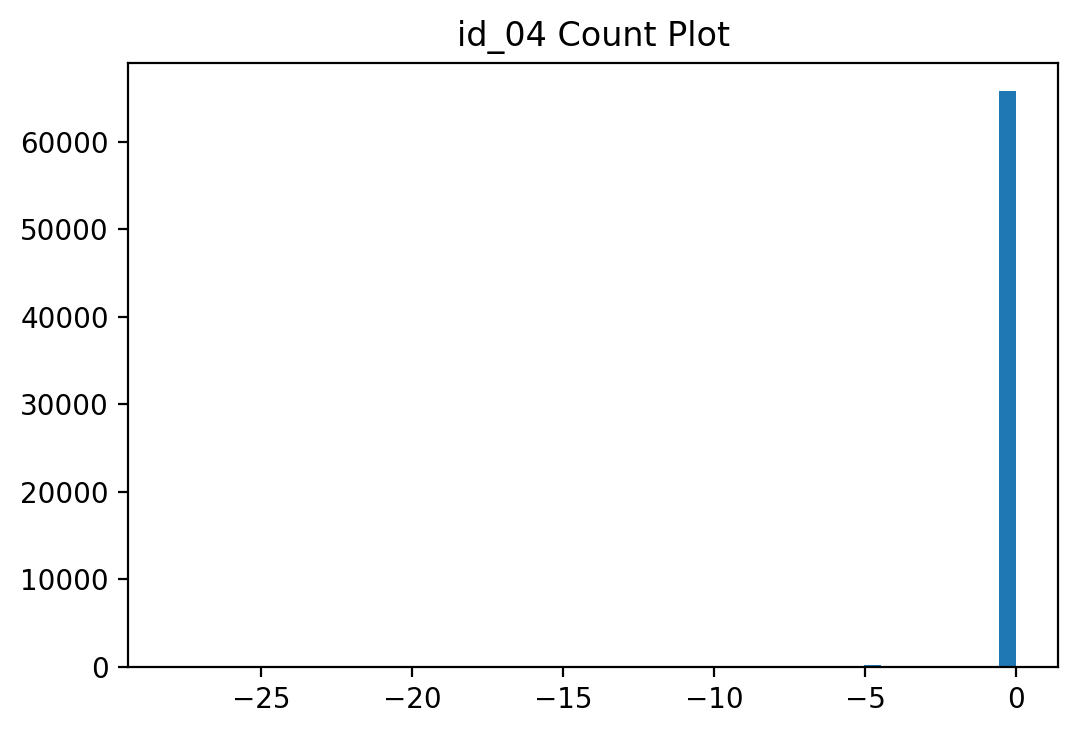

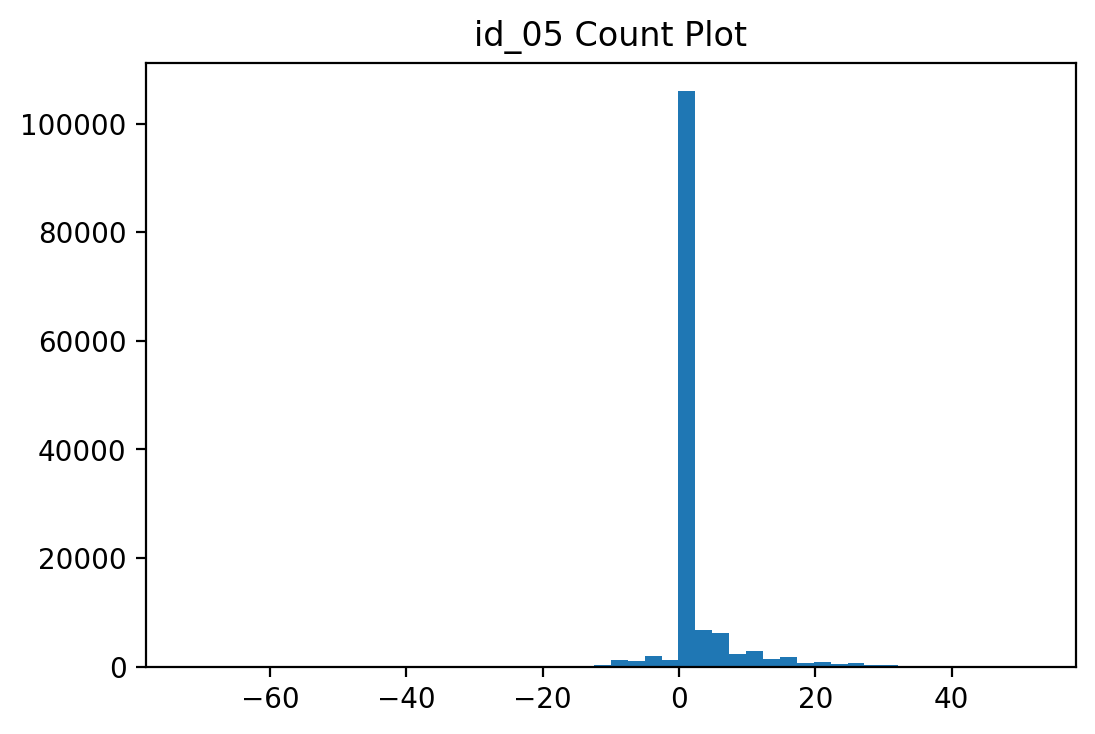

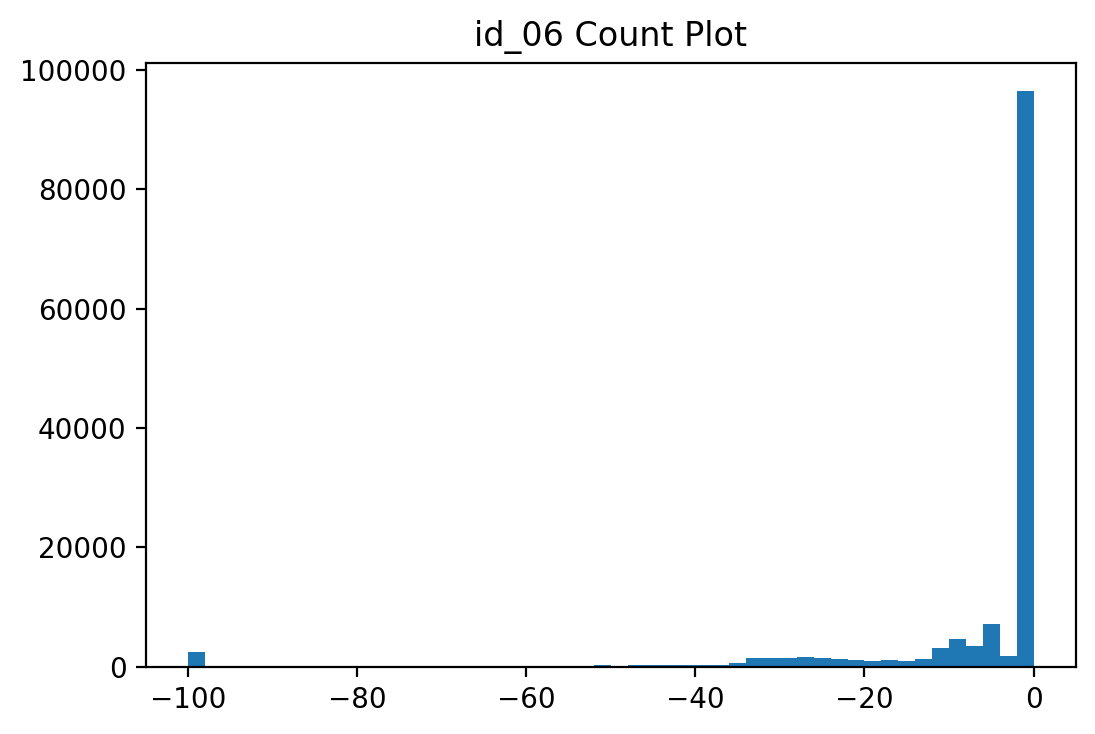

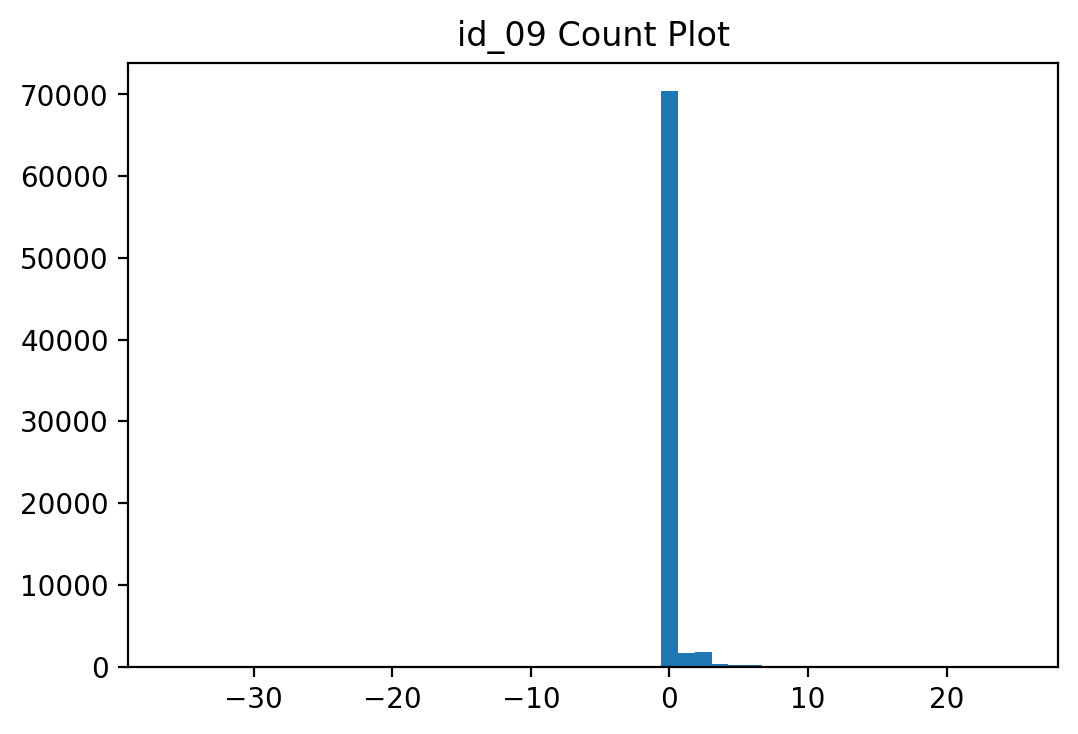

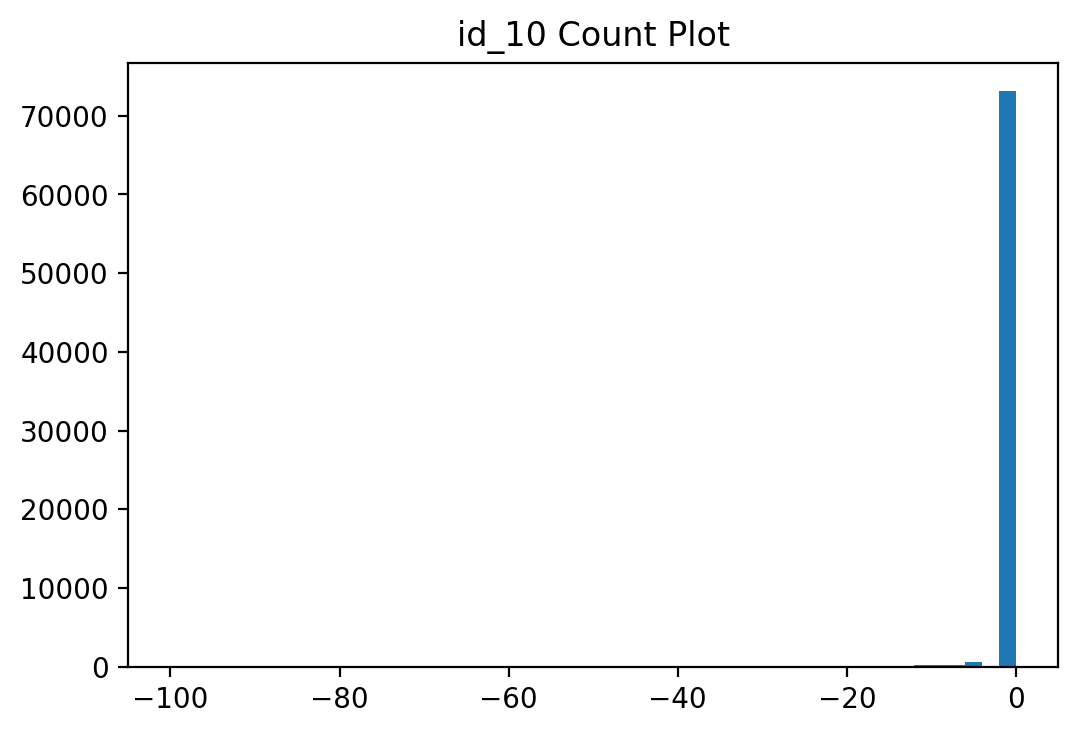

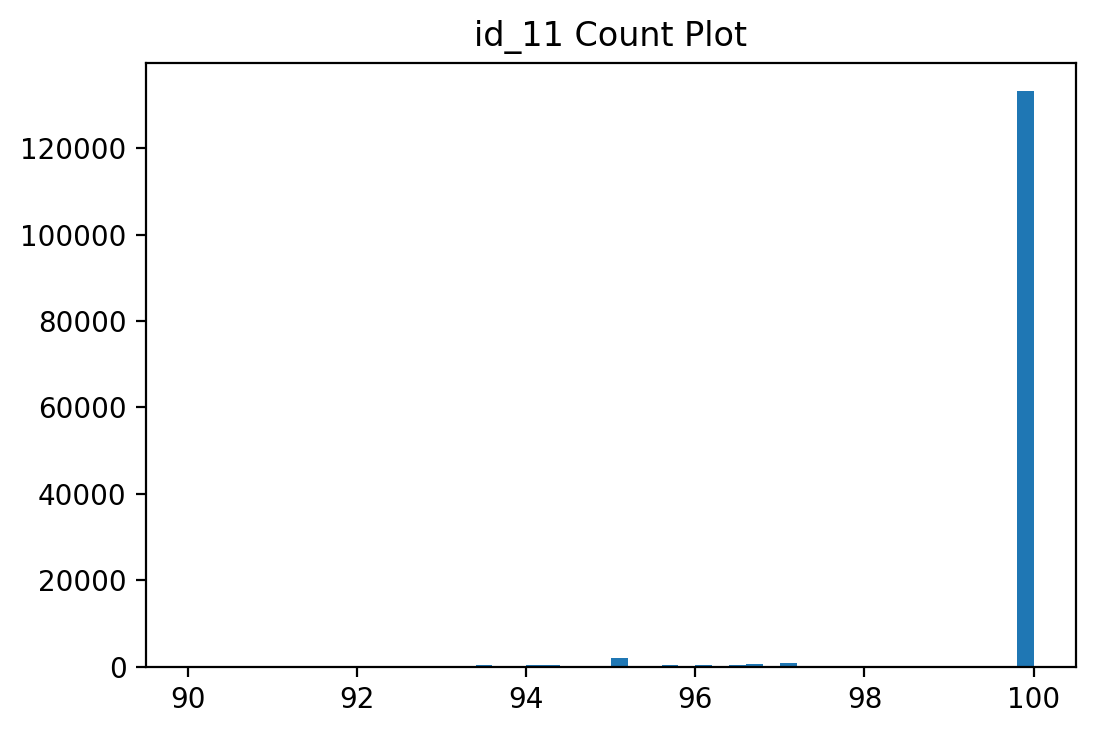

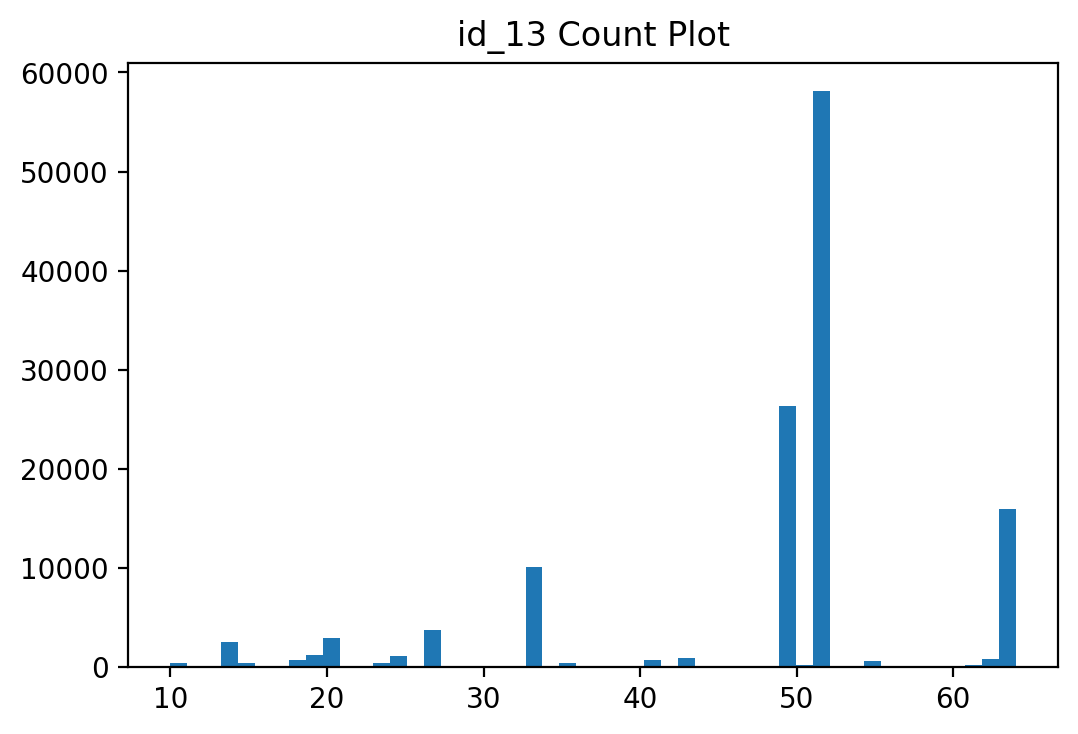

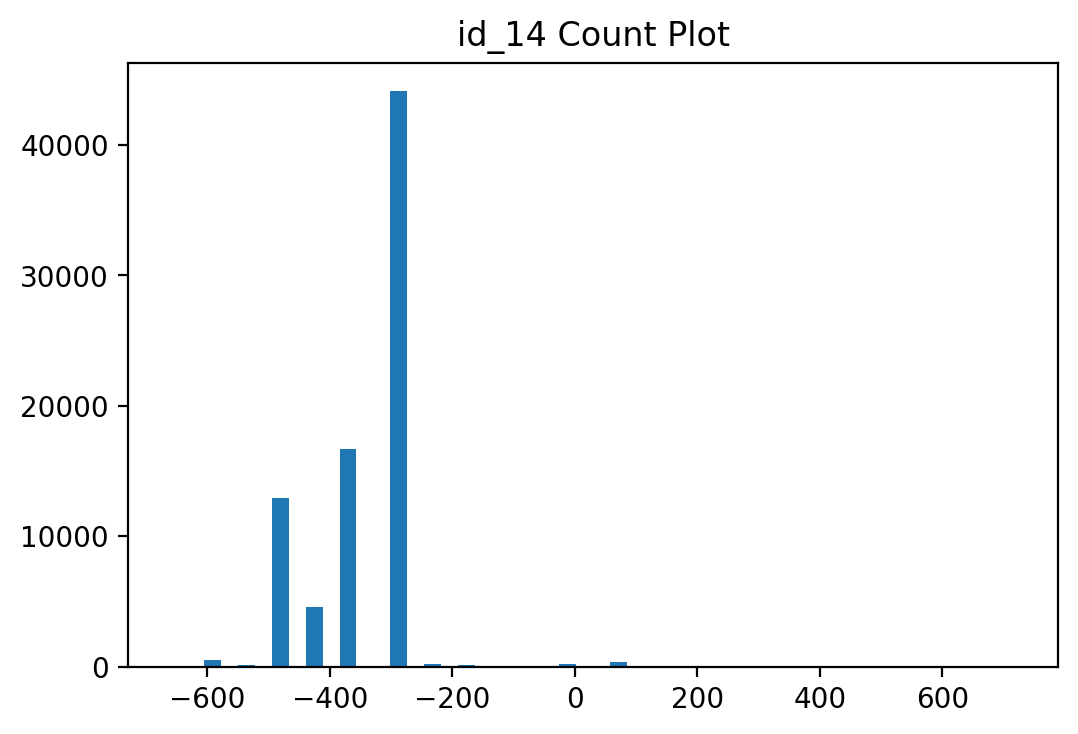

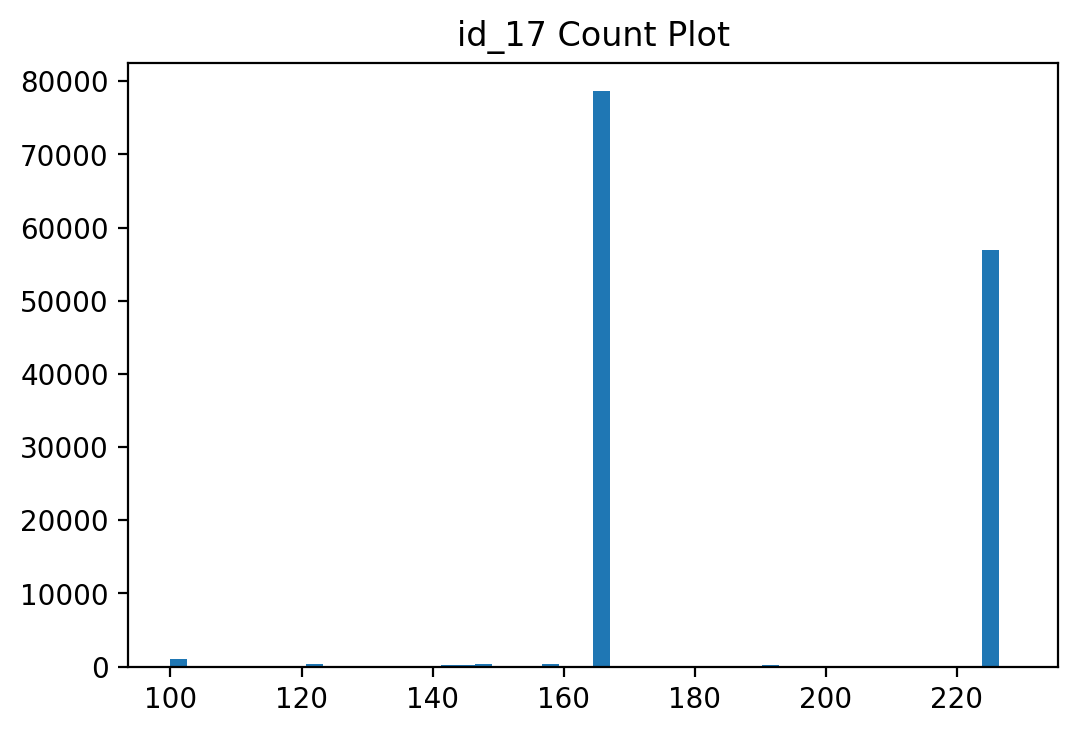

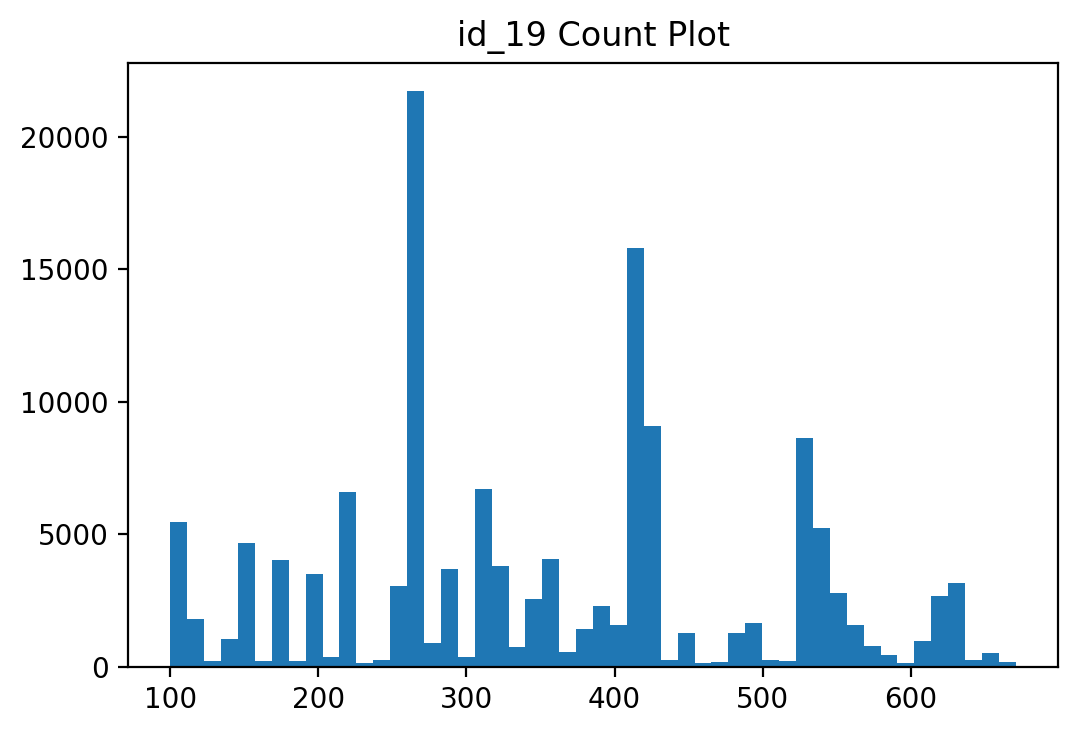

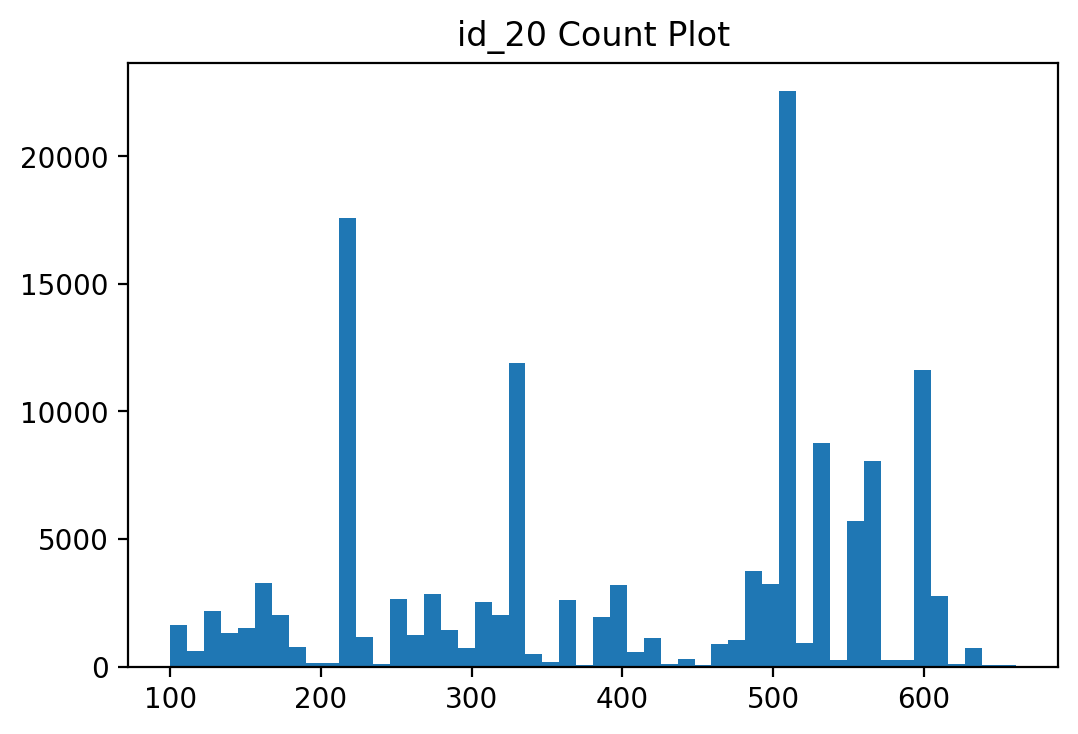

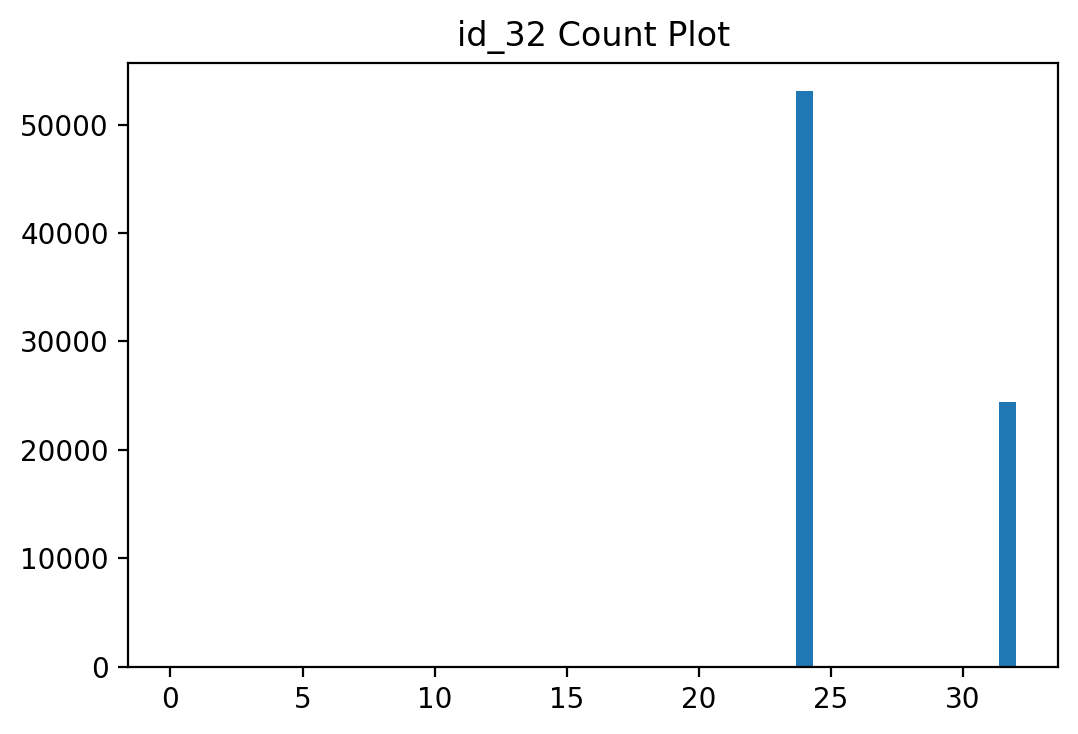

In [12]:
#Check the distribution of id_{} features, and the results are saved under the:./pic folder. The distribution is very uneven.
id_cols = ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_19', 'id_20', 'id_32']
print(id_cols)
for col in id_cols:
    plt.figure(dpi=200)
    plt.title(f'{col} Count Plot')
    plt.hist(df[col], bins=50)
    plt.savefig(os.path.join(pic_root,f'{col}_Count_Plot.jpg'))

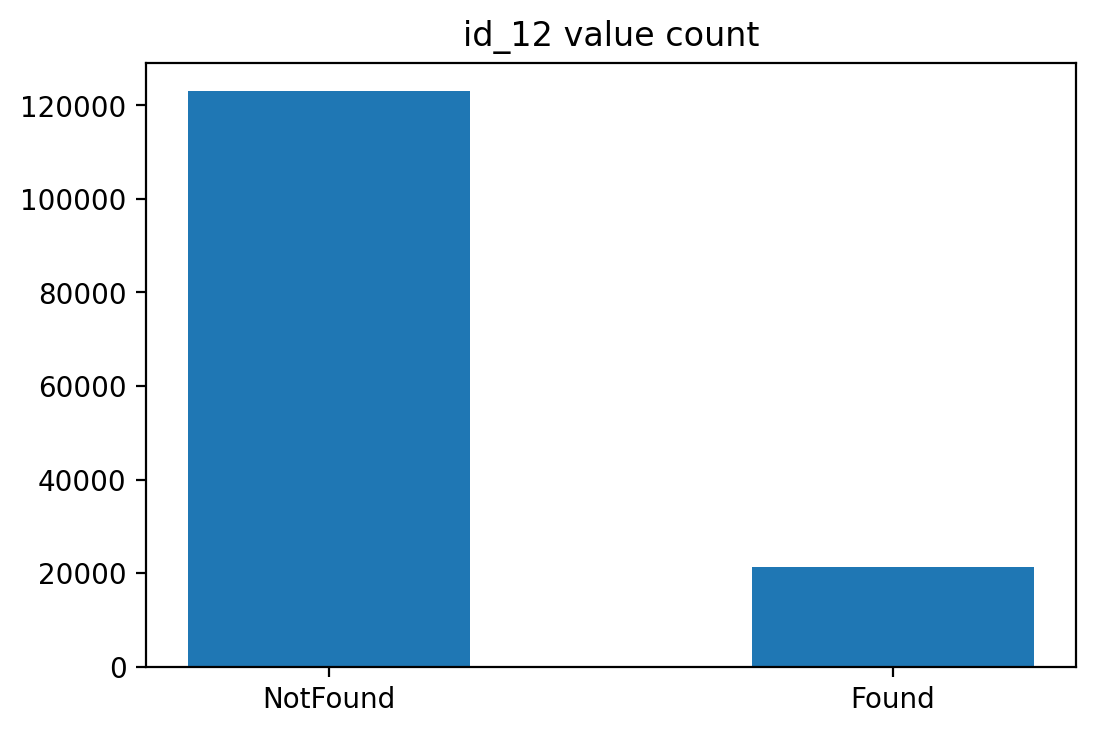

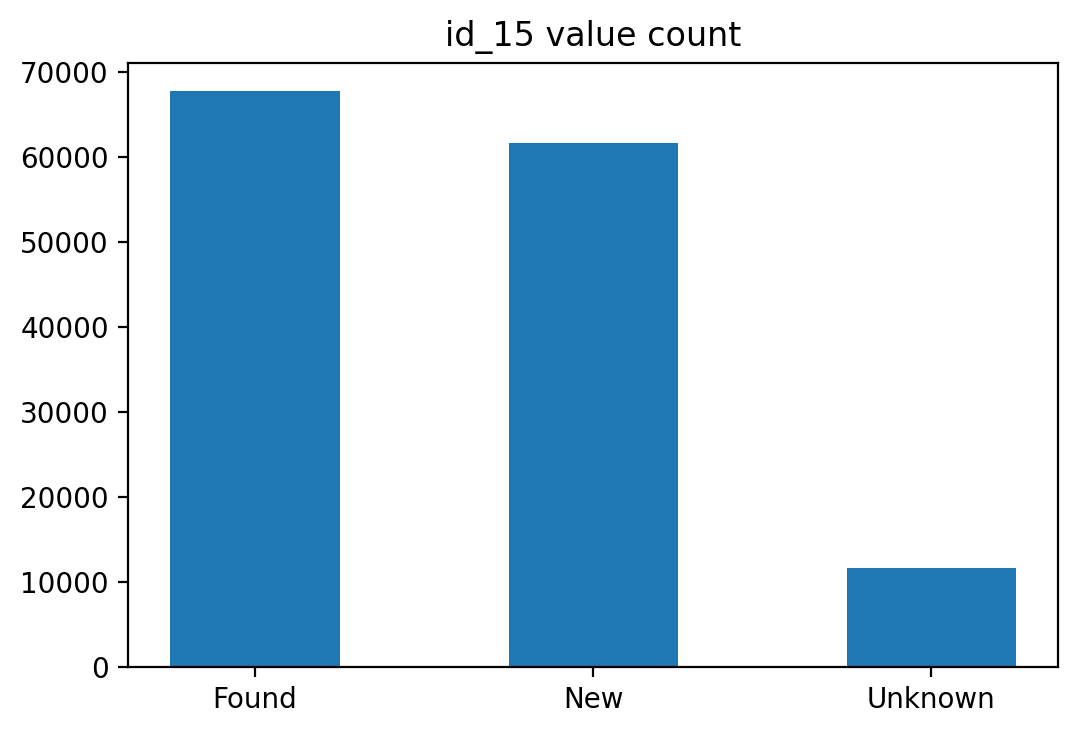

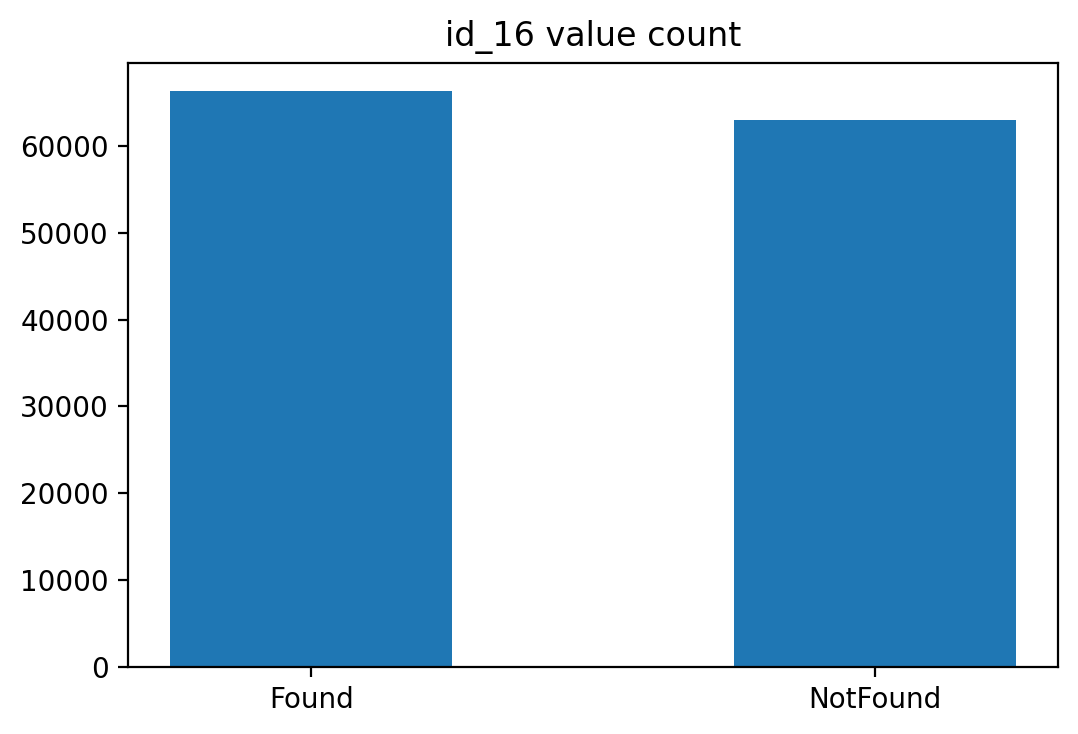

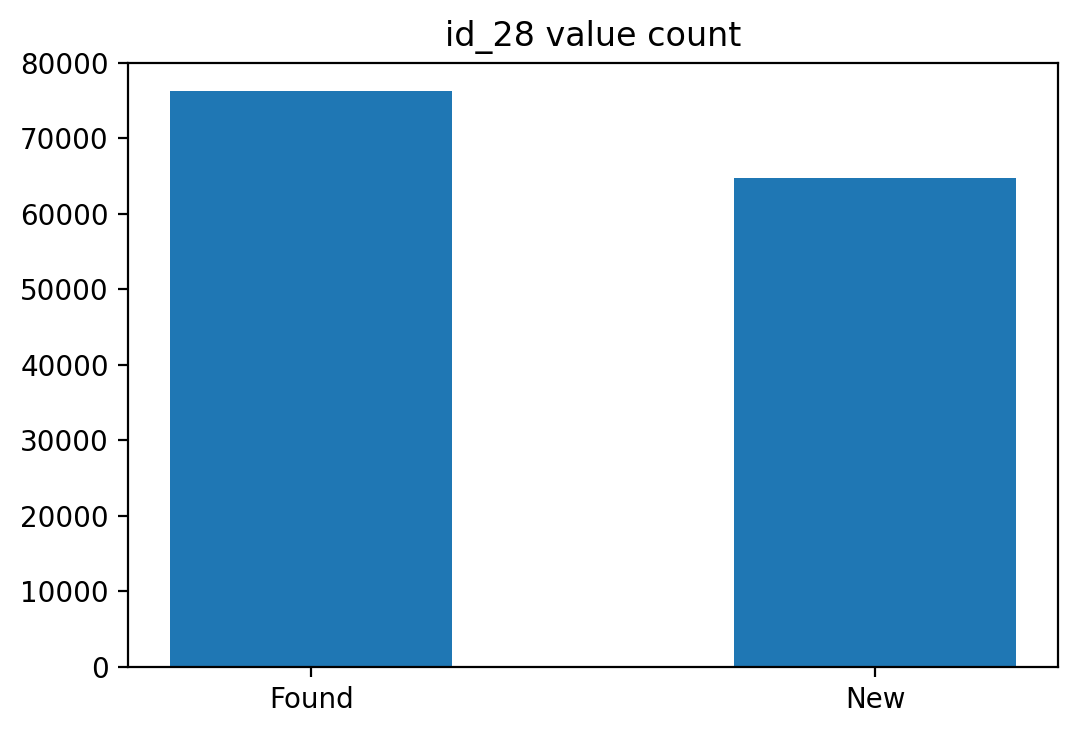

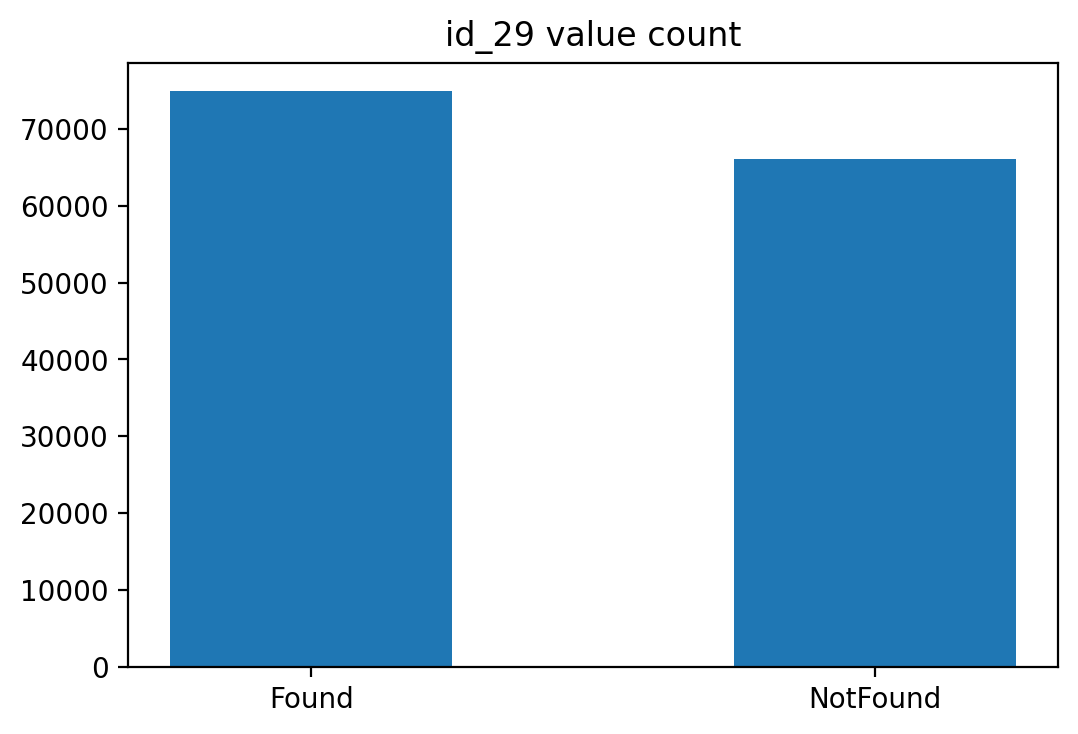

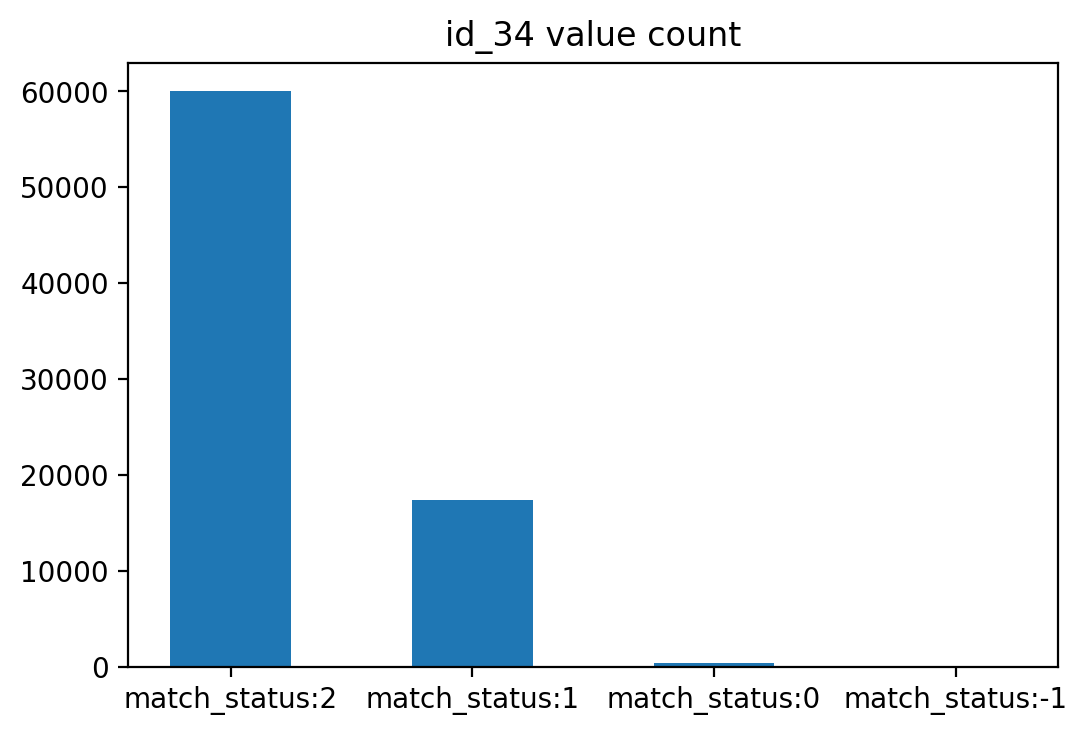

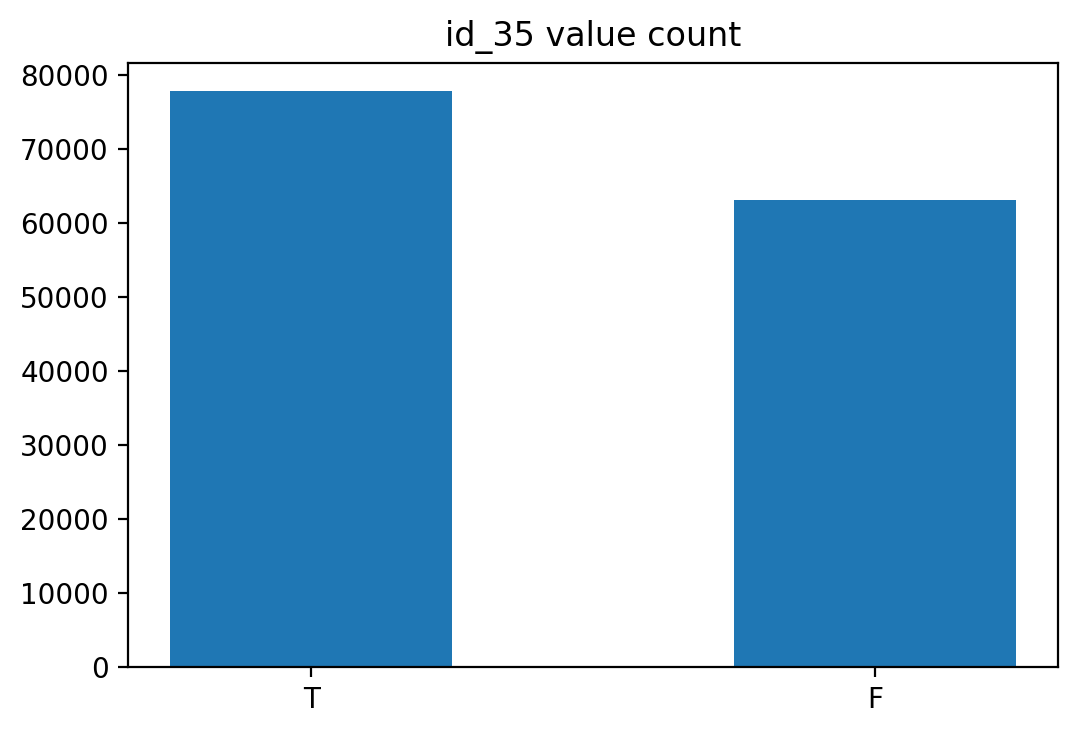

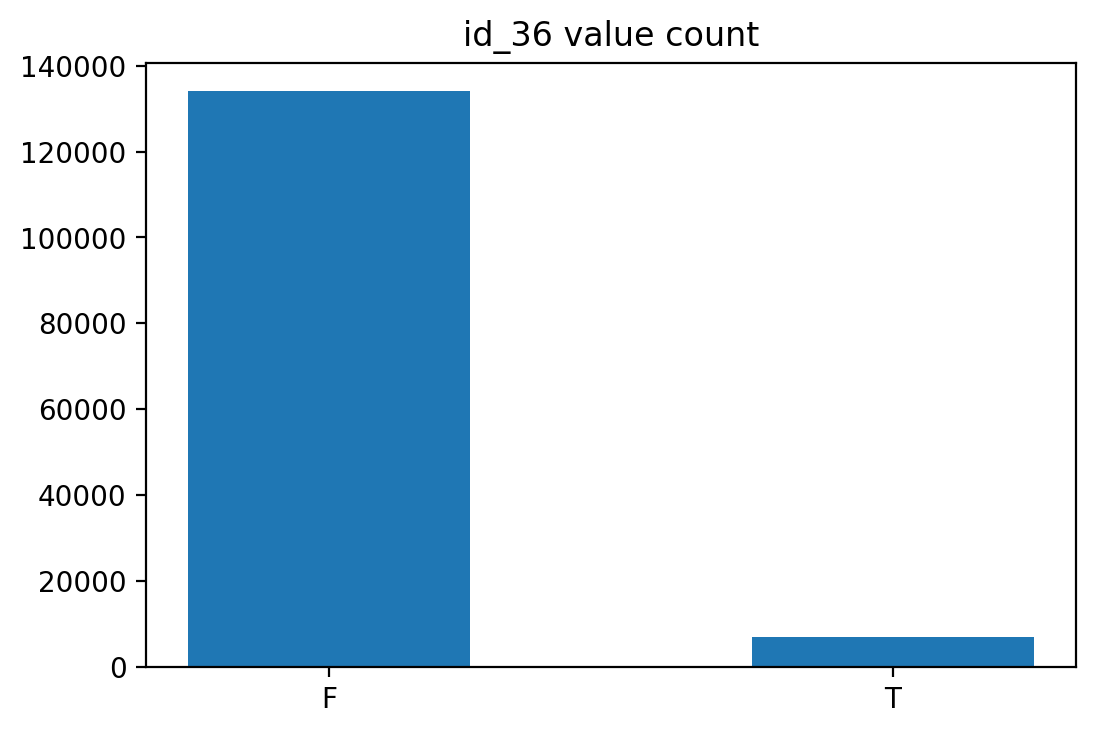

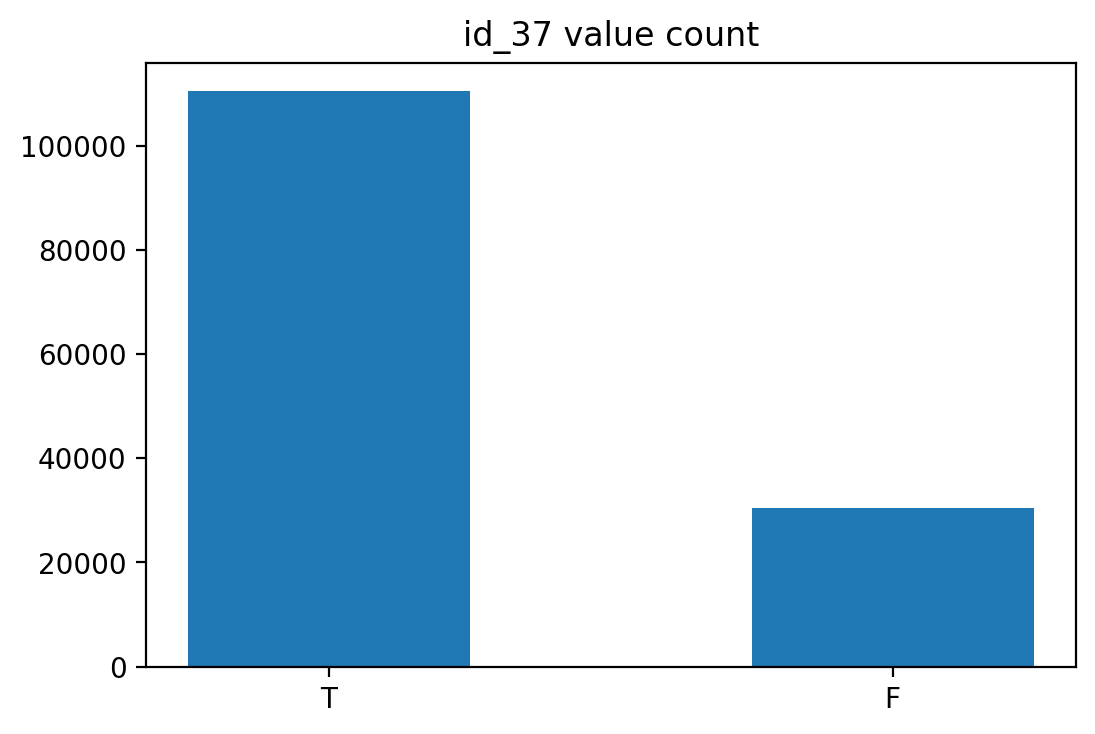

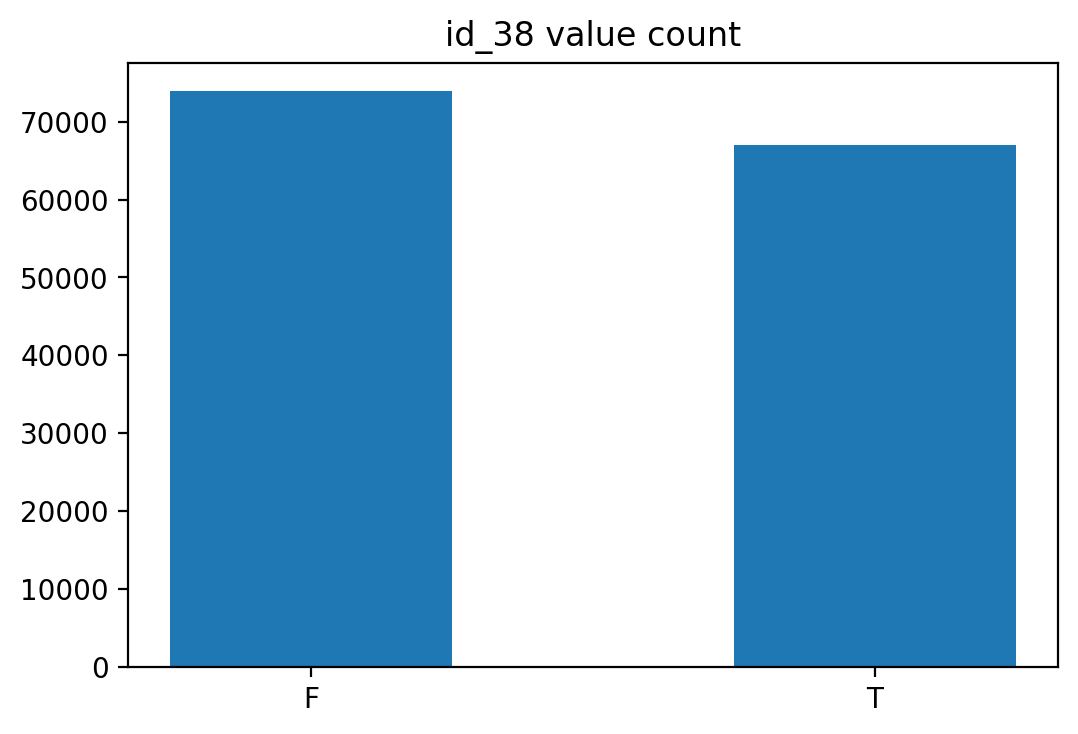

In [13]:
#Check the value distribution of id_{} features. The count of id features here is particularly small, which is different from the id features above.
for col in ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']:
    plt.figure(dpi=200)
    plt.title(f'{col} value count')
    s=df[col].value_counts()
    plt.bar(s.index, height=s.values, width=0.5)
    plt.savefig(os.path.join(pic_root,f'{col}_value_count.jpg'))

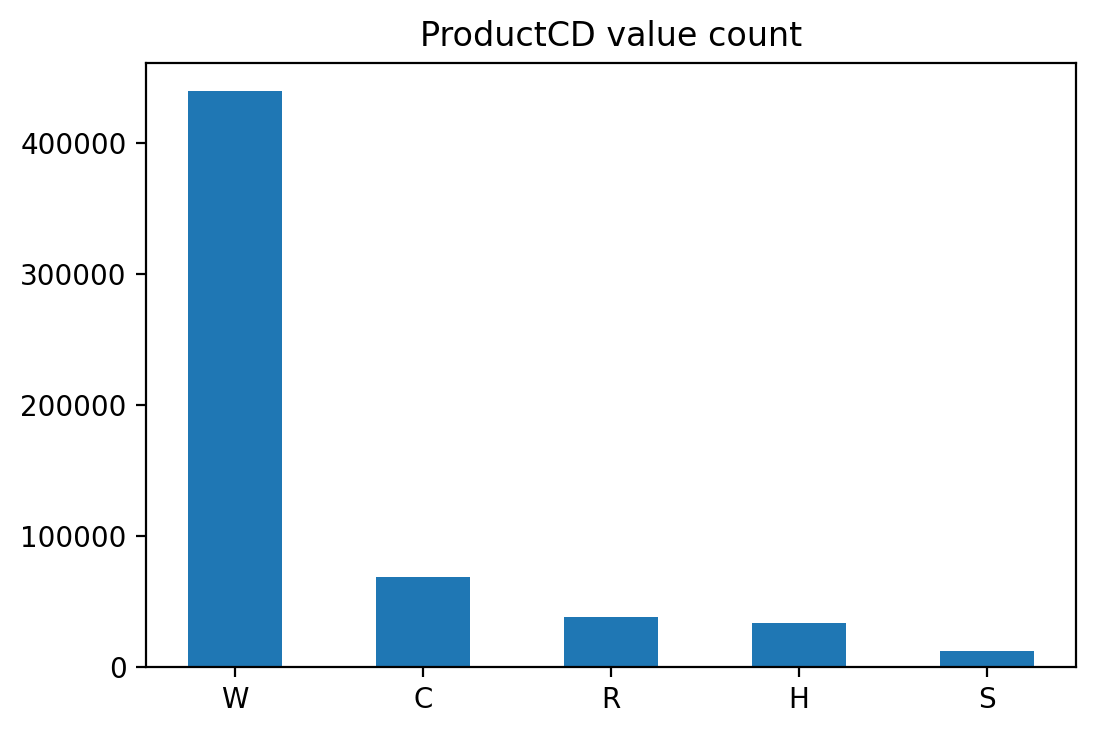

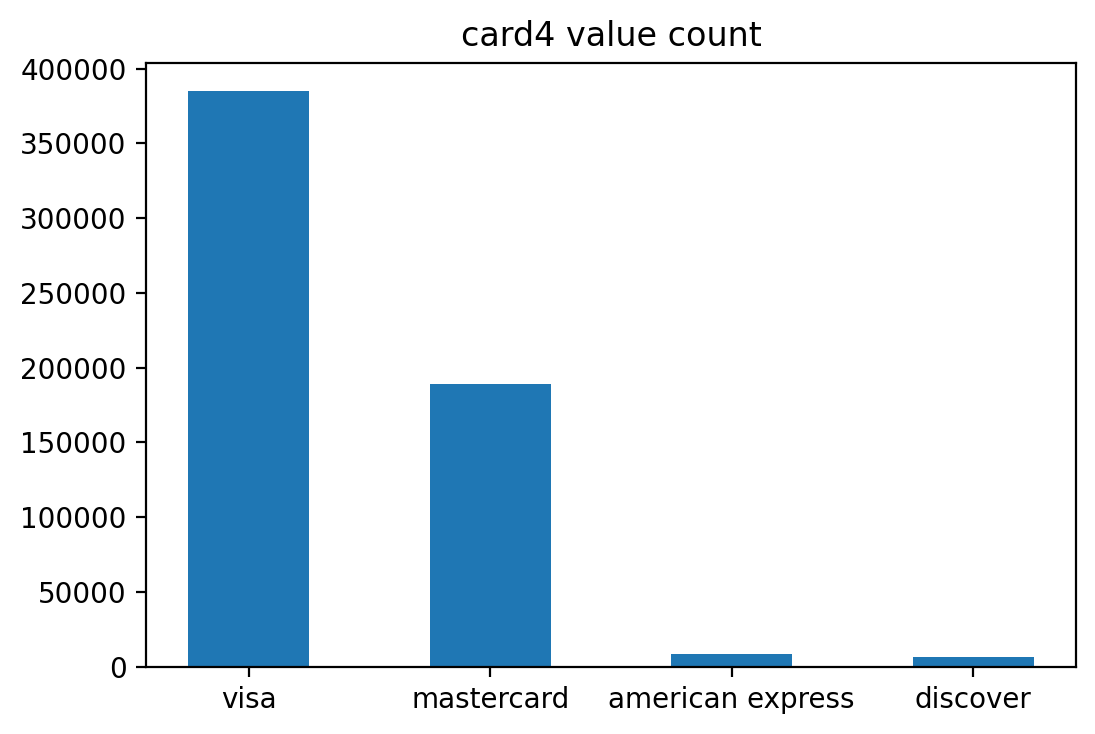

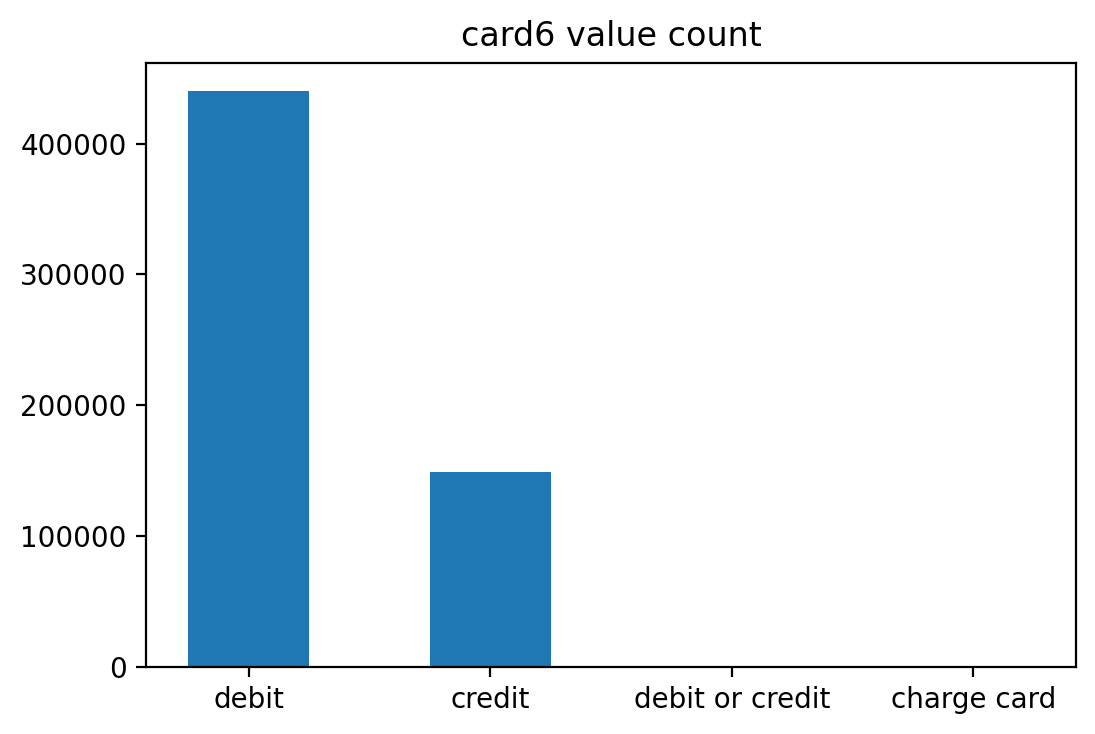

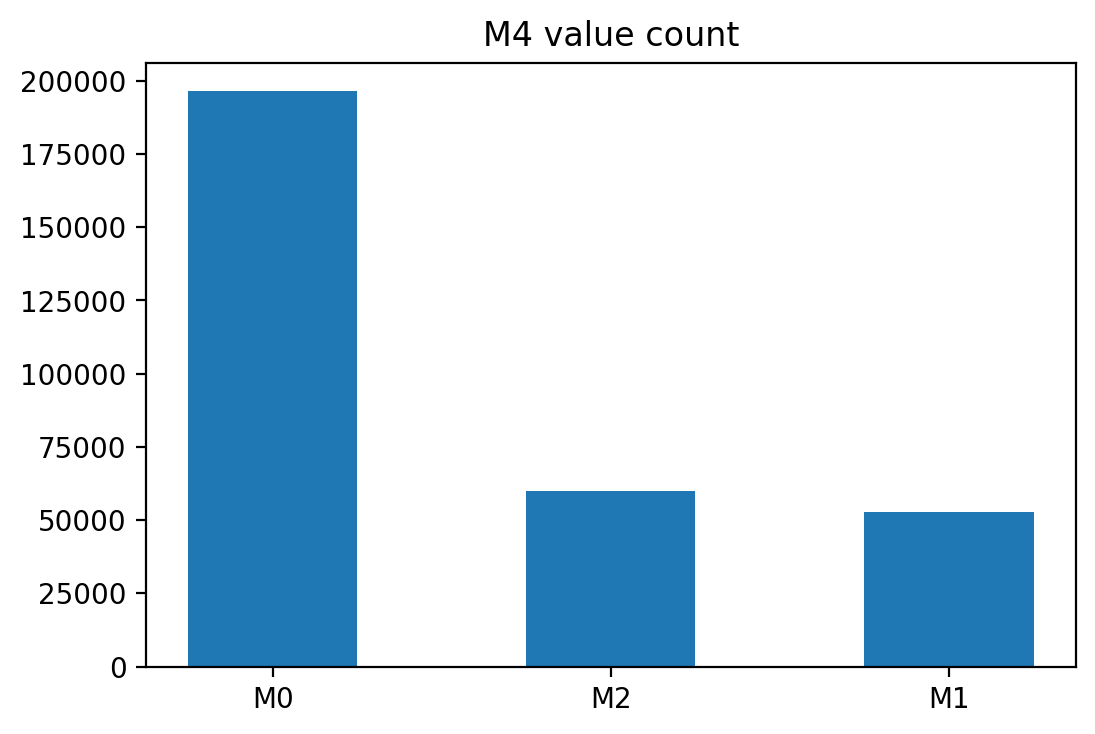

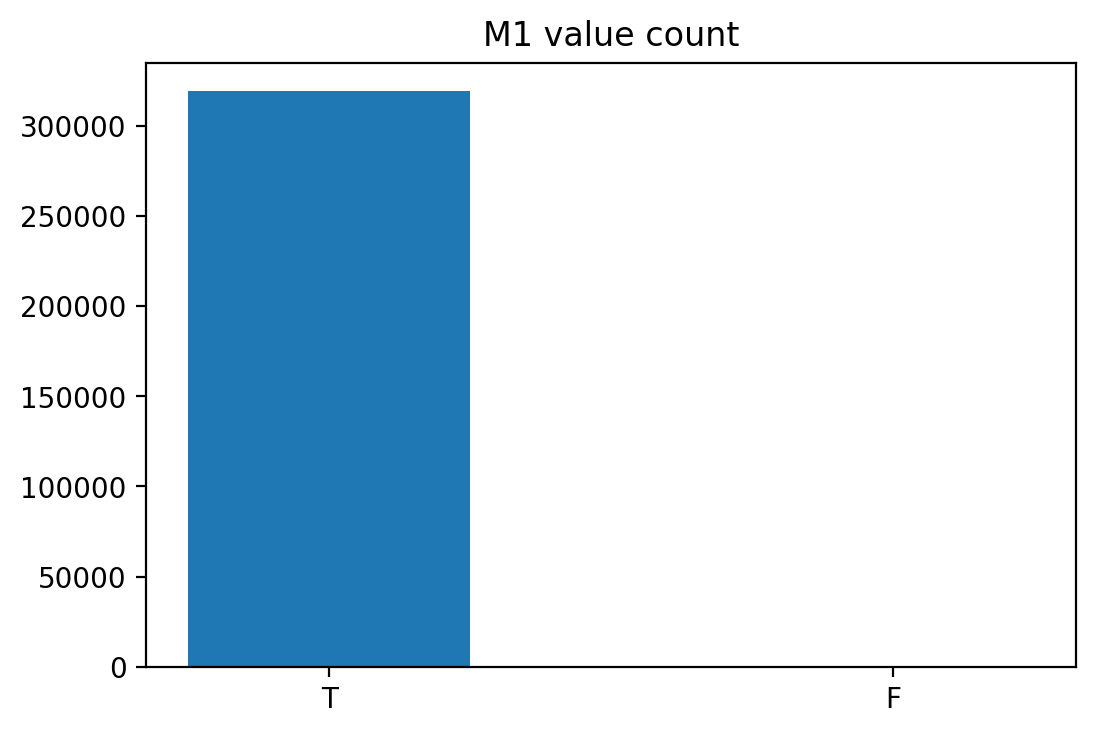

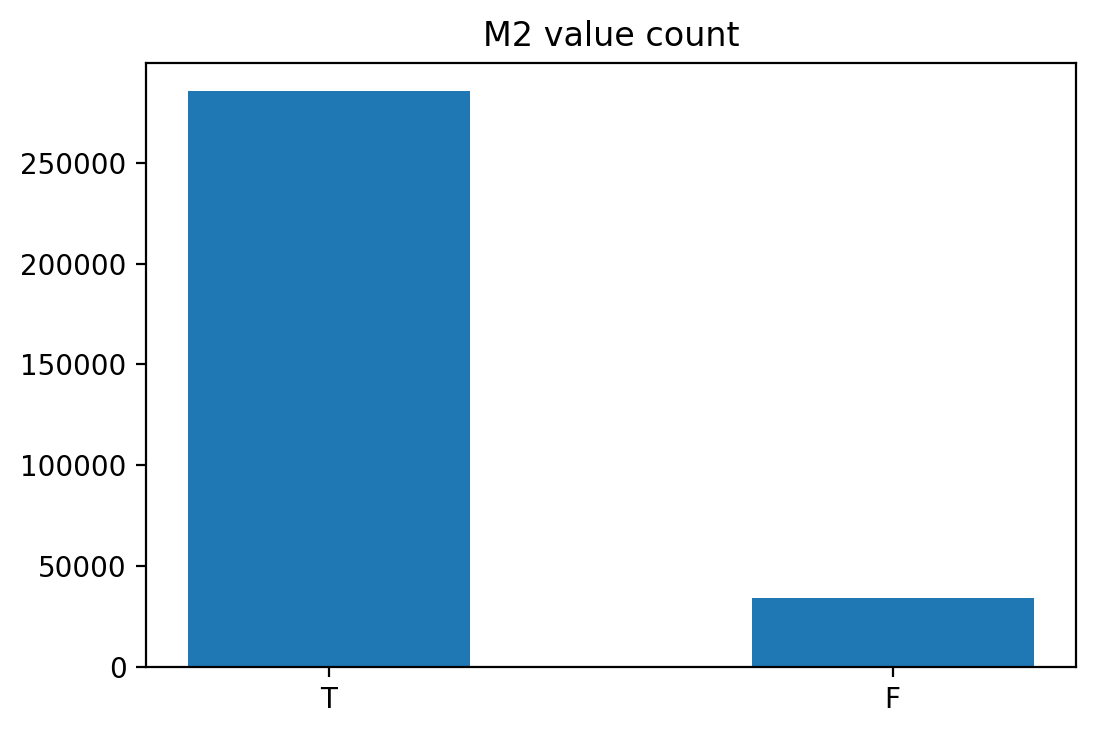

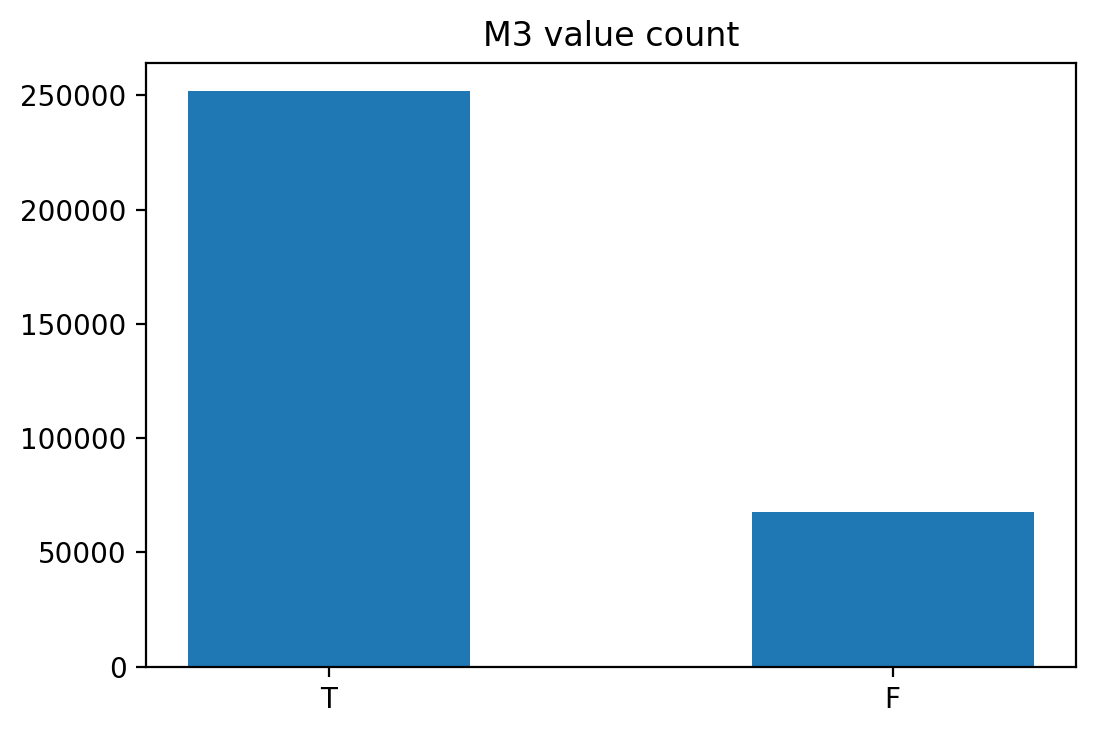

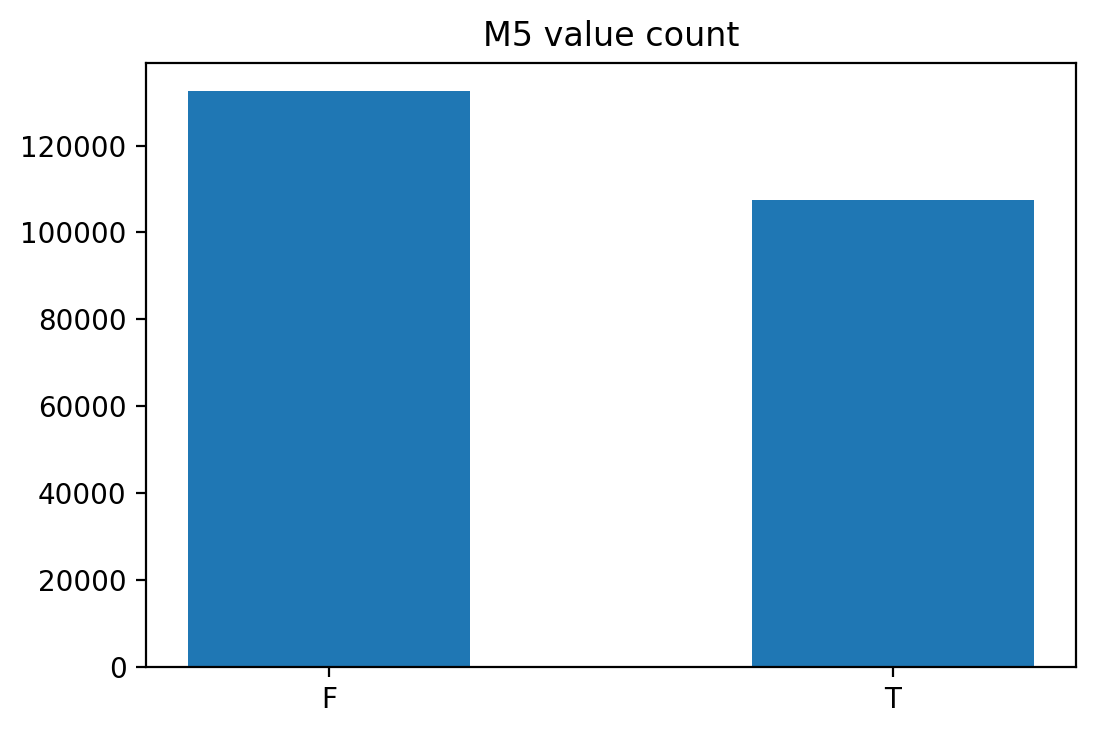

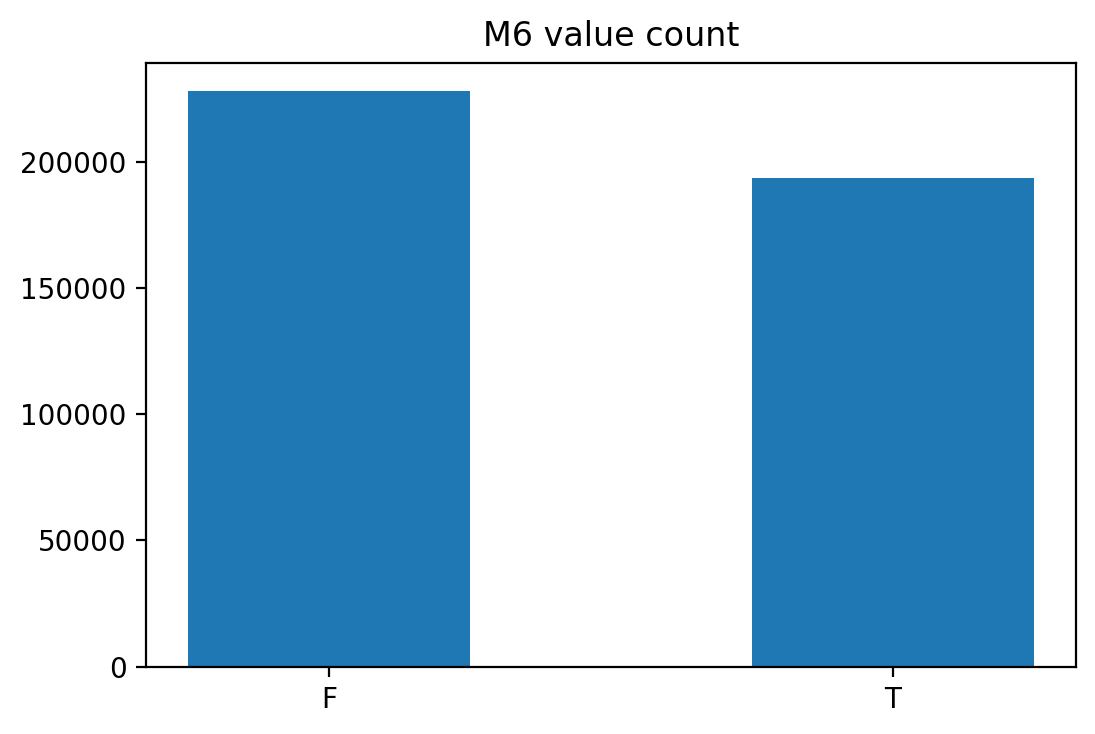

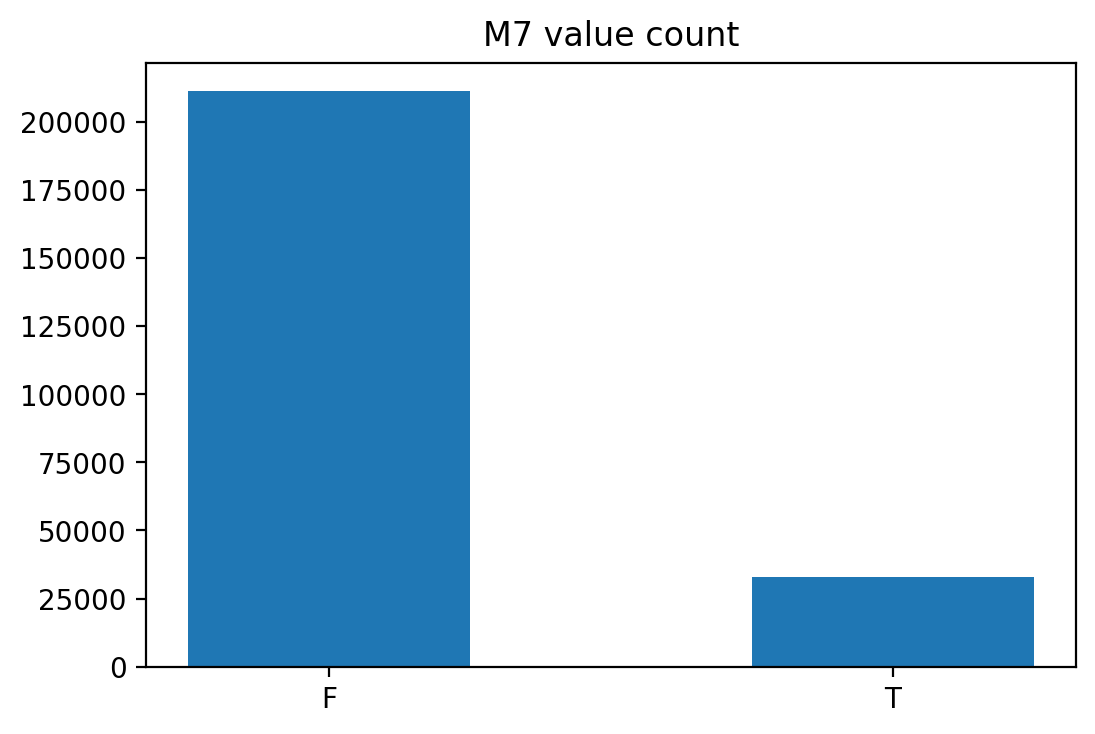

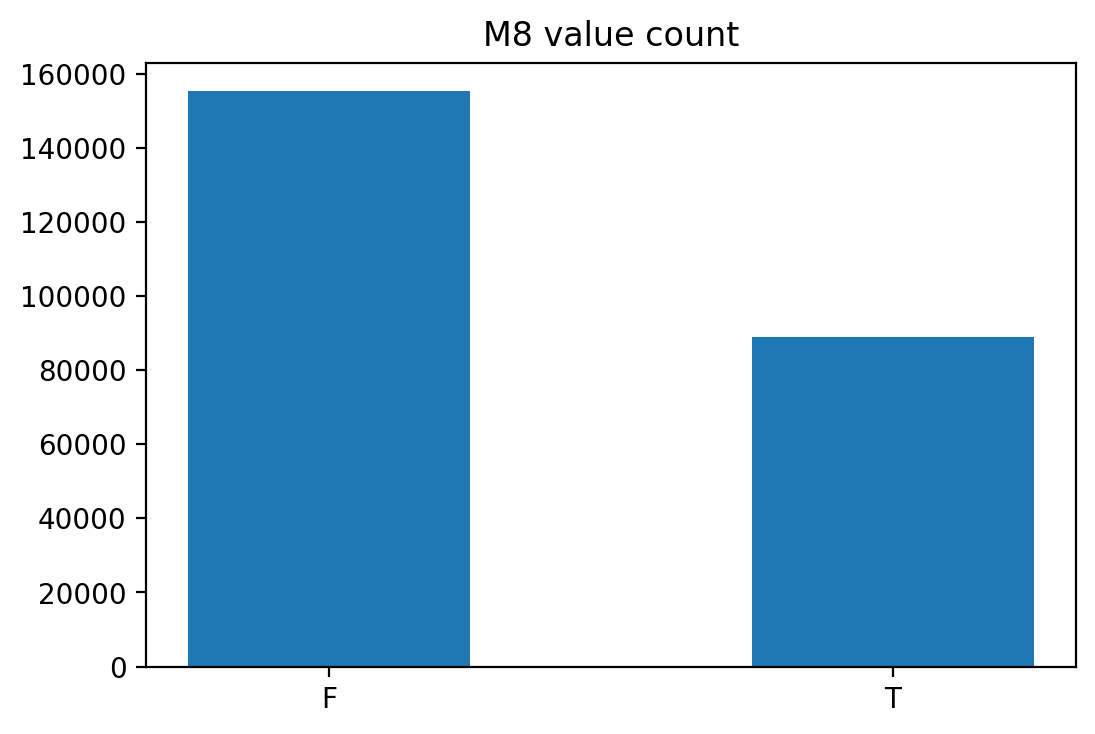

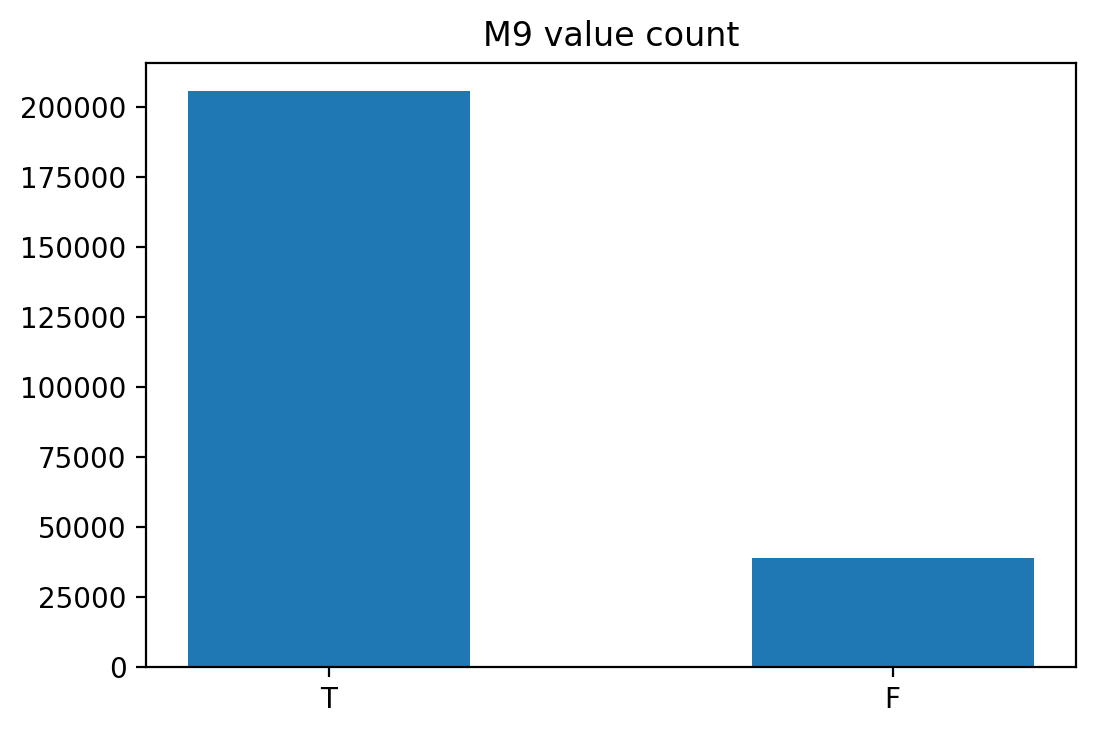

In [13]:
#查看i其他特征的count情况
for col in ['ProductCD', 'card4', 'card6', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']:
    plt.figure(dpi=200)
    plt.title(f'{col} value count')
    s=df[col].value_counts()
    plt.bar(s.index, height=s.values, width=0.5)
    plt.savefig(os.path.join(pic_root,f'{col}_value_count.jpg'))

In [14]:
#View the relevance of each feature
def cor_heat(df,corr_method,figsize):
    cor=df.corr(method =corr_method)
    plt.figure(figsize=figsize,dpi=100)
    sns.heatmap(data=cor,annot=True,square=True,linewidths=0.1)
    plt.title(f"{corr_method} co-relation heat map")
    plt.savefig(os.path.join(pic_root,f'{corr_method}_{df.shape[1]}.jpg'))

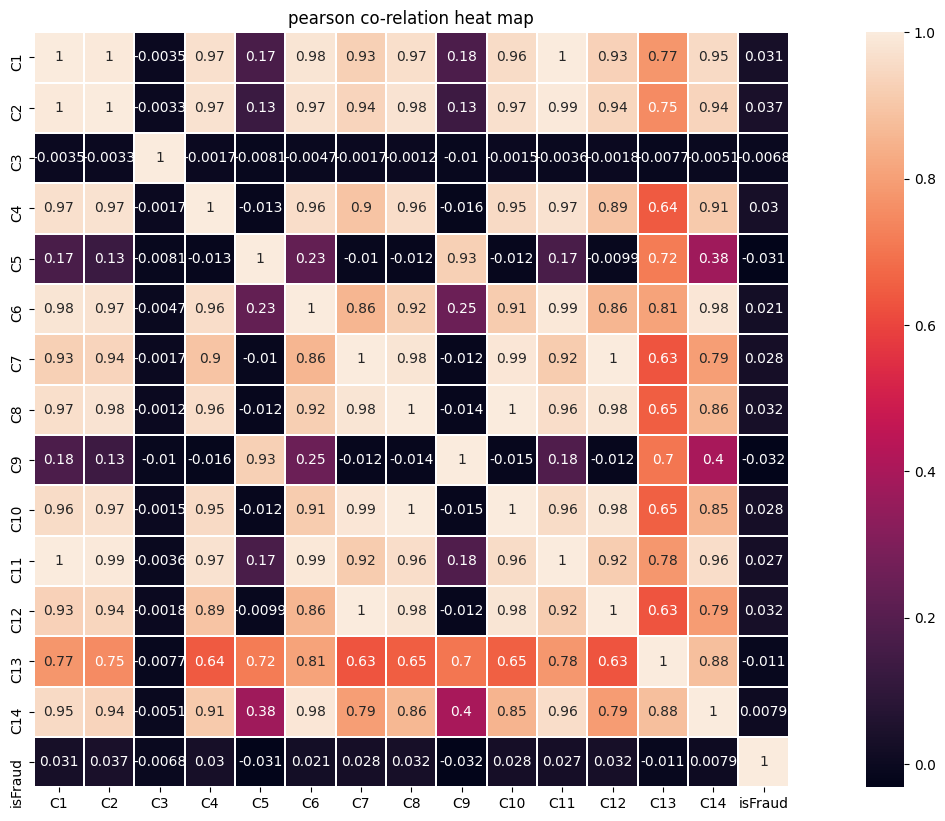

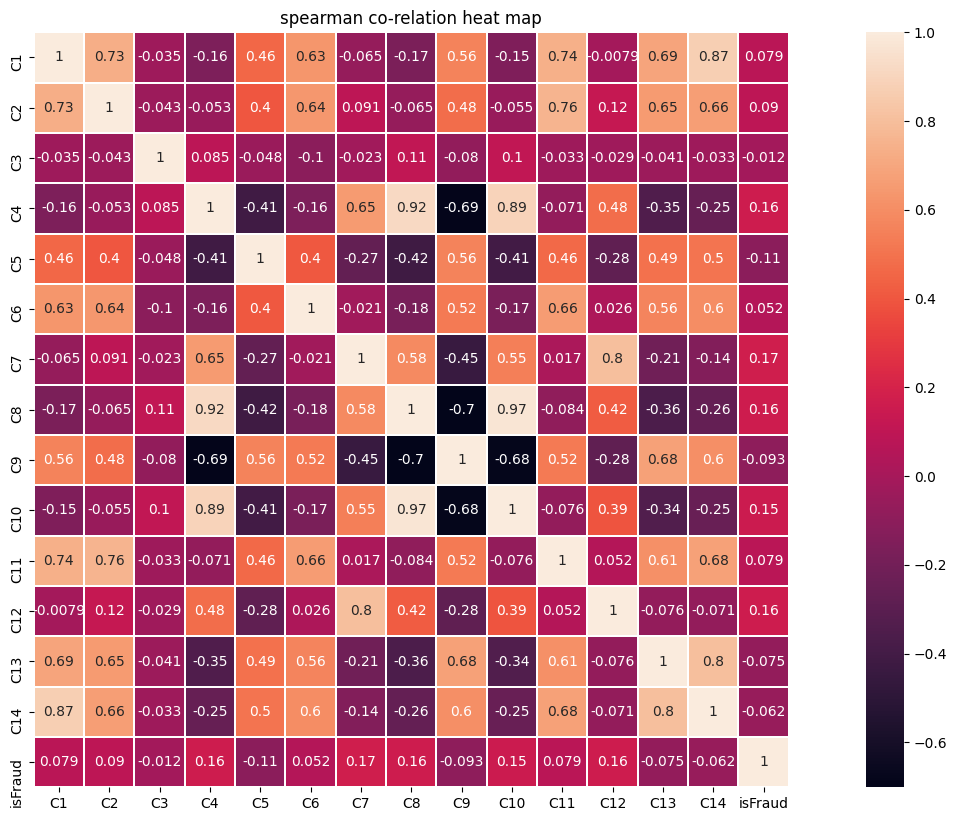

In [15]:
#View the correlation distribution between c_{} series features and isFraud
corr_method_list = ['pearson','spearman']
# corr_method_list = ['pearson','spearman','kendall']  
use_col = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'isFraud']
for corr_method in corr_method_list:
    cor_heat(df[use_col],corr_method,(20,10))

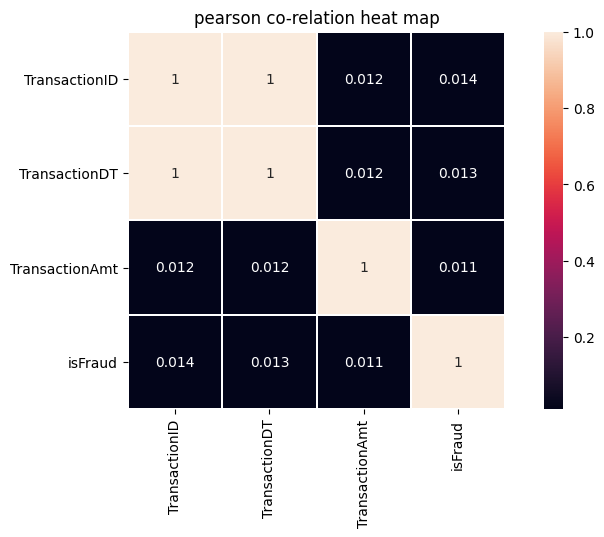

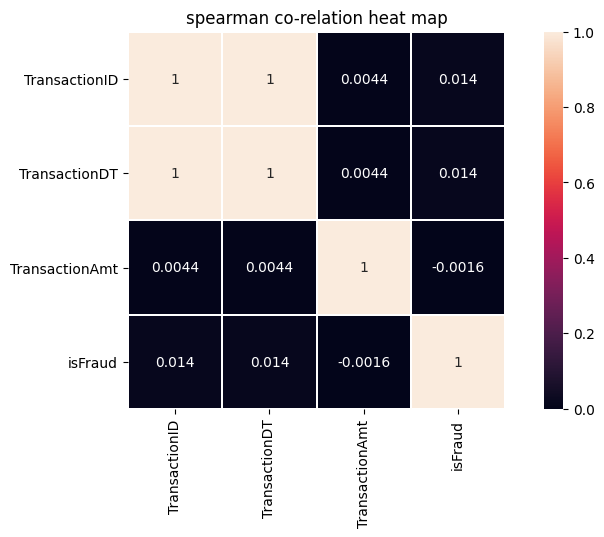

In [16]:
#View the correlation between other columns and isFruad
# corr_method_list = ['pearson','spearman','kendall']
corr_method_list = ['pearson','spearman']
use_col = ['TransactionID', 'TransactionDT', 'TransactionAmt', 'isFraud']
for corr_method in corr_method_list:
    cor_heat(df[use_col],corr_method,(10,5))